<tr>
        <td>
            <div align="left">
                <font size=25px>
                    <b>Credit Classification Model
                    </b>
                </font>
            </div>
        </td>
    </tr>

## Problem Statement:
ABC Bank wants to identify and understand their customers better to determine the appropriate credit amount to be offered based on multiple factors. The bank possesses a vast dataset containing customer information and other relevant parameters. The bank aims to develop a robust model that can accurately group customer based on their creditworthiness. This will enable the bank to make informed decisions about the credit amount to be extended to each customer group, which can help mitigate risk, ensure responsible lending practices, and optimize loan portfolio management. Additionally, the model can assist the bank in identifying potential high-value customers, tailoring credit offers based on risk profiles, and complying with regulatory requirements.

In [1]:
'''
Data Definition
a. serial number : unique identification key
b. account_info : Categorized details of existing accounts of the individuals. 
   The balance  of money in account provided is stated by this variable
c. duration_month : Duration in months for which the credit is existing
d. credit_history : This categorical variable signifies the credit history of the 
   individual who has taken the loan
e. purpose: This variable signifies why the loan was taken
f. savings_account: This variable signifies details of the amount present in savings 
   account of the individual
g. employment_st: Categorical variable that signifies the employment status of 
   everyone who has been alloted loans
h. poi: This numerical variable signifies what percentage of disposable income is 
   spent on loan interest amount
i. personal_status: This categorical variable signifies the personal status of the individual
j. guarantors: Categorical variable which signifies if any other individual is involved 
   with an individual loan case
k. resident_since: Numerical variable that signifies for how many years the applicant
   has been a resident
n. installment_type: This variable signifies other installment types taken
o. housing_type: This is a categorical variable that signifies which type of 
   housing does a applicant have.
p. credits_no: Numerical variable for number of credits taken by the person
q. job_type: Signifies the employment status of the person
r. liables: Signifies number of persons dependent on the applicant
s. telephone: Signifies if the individual has a telephone or not
t. foreigner: Signifies if the individual is a foreigner or not 
   (considering the country of residence of the bank)
'''


'\nData Definition\na. serial number : unique identification key\nb. account_info : Categorized details of existing accounts of the individuals. \n   The balance  of money in account provided is stated by this variable\nc. duration_month : Duration in months for which the credit is existing\nd. credit_history : This categorical variable signifies the credit history of the \n   individual who has taken the loan\ne. purpose: This variable signifies why the loan was taken\nf. savings_account: This variable signifies details of the amount present in savings \n   account of the individual\ng. employment_st: Categorical variable that signifies the employment status of \n   everyone who has been alloted loans\nh. poi: This numerical variable signifies what percentage of disposable income is \n   spent on loan interest amount\ni. personal_status: This categorical variable signifies the personal status of the individual\nj. guarantors: Categorical variable which signifies if any other individua

## Content
1. **[Import Packages](#import_packages)**
2. **[Read Data](#Read_Data)**
3. **[Data Preprocessing and Data Exploration(EDA)](#Data_Exploration_and_Data_Preprocessing)**
4. **[Modeling & Evaluation](#Modelling&Evaluation)**





1.Import Packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns
from sklearn import tree
from sklearn.preprocessing import LabelEncoder as le  
from sklearn.preprocessing import RobustScaler as rbScaler 
from sklearn.ensemble import RandomForestClassifier as rfClassifier 

In [3]:
#setting default plot size for all your plots
plt.rcParams['figure.figsize'] = (15,5)

2.Read the data

In [4]:
#Read the data using read_csv() function from pandas
credit_df = pd.read_csv("ABC_Bank_train_data.csv")
#Printing random 10 rows of the data
credit_df.sample(10)

,serial number,account_info,duration_month,credit_history,purpose,savings_account,employment_st,poi,personal_status,gurantors,...,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner,Group_no
764,765,A14,24,A34,A40,A62,A74,4.0,A94,A101,...,A122,27.0,A143,A152,2,A173,1,A192,A201,2
202,203,A14,27,A33,A49,A61,A74,3.0,A93,A101,...,A123,26.0,A143,A152,2,A173,1,A191,A201,1
564,565,A12,24,A33,A49,A65,A73,NaN,A93,A101,...,A122,37.0,A141,A152,2,A174,1,A192,A201,1
335,336,A11,6,A34,A42,A61,A73,1.0,A91,A101,...,A121,44.0,A143,A151,1,A174,1,A192,A201,2
595,596,A12,6,A31,A40,A62,A72,1.0,A92,A101,...,A122,32.0,A142,A152,1,A172,1,A191,A201,3
728,729,A12,48,A31,A49,A61,A75,4.0,A92,A101,...,A124,59.0,A143,A151,1,A173,1,A191,A201,1
578,579,A12,36,A34,A40,A61,A72,4.0,A91,A101,...,A123,27.0,A143,A152,2,A173,1,A191,A201,2
647,648,A14,12,A32,A40,A63,A73,2.0,A92,A101,...,A122,26.0,A143,A152,1,A173,1,A191,A201,3
276,277,A14,18,A34,A43,A61,A73,2.0,A92,A101,...,A123,26.0,A143,A152,2,A173,1,A191,A201,2
40,41,A14,30,A32,A43,A63,A75,NaN,A93,A101,...,A123,30.0,A141,A152,1,A174,1,A191,A201,2


3.Data Preprocessing & Data Exploration

In [5]:
#shows count of rows and columns
credit_df.shape

(800, 21)

There are 800 rows(observations) and 21 columns(features) in the dataframe.

In [6]:
#Getting information about dataset
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   serial number     800 non-null    int64  
 1   account_info      800 non-null    object 
 2   duration_month    800 non-null    int64  
 3   credit_history    800 non-null    object 
 4   purpose           800 non-null    object 
 5   savings_account   800 non-null    object 
 6   employment_st     792 non-null    object 
 7   poi               788 non-null    float64
 8   personal_status   800 non-null    object 
 9   gurantors         792 non-null    object 
 10  resident_since    800 non-null    int64  
 11  property_type     800 non-null    object 
 12  age               796 non-null    float64
 13  installment_type  800 non-null    object 
 14  housing_type      793 non-null    object 
 15  credits_no        800 non-null    int64  
 16  job_type          800 non-null    object 
 1

In [7]:
#The information about dataset
#1.Number of columns:21
#2.Number of rows:0 to 799(800)
#we can see column labels, column data types
#Also we can observe that employment_st,poi,gurantors, age, housing_type colums have missing values.

serial number does not have any impact on the creditworthiness of a customer.So removing
serial number column. 

In [8]:
#dropping serial number column from the dataset
credit_df1=credit_df.drop('serial number',axis=1)
credit_df1.shape

(800, 20)

The target variable  Group_no is a categorical column but markes as numerical.So fixing the datatype of  Group_no column

In [9]:
#Changing datatype of Group_no column
credit_df1['Group_no']=credit_df1['Group_no'].astype('object')
credit_df1.dtypes

account_info         object
duration_month        int64
credit_history       object
purpose              object
savings_account      object
employment_st        object
poi                 float64
personal_status      object
gurantors            object
resident_since        int64
property_type        object
age                 float64
installment_type     object
housing_type         object
credits_no            int64
job_type             object
liables               int64
telephone            object
foreigner            object
Group_no             object
dtype: object

In [10]:
#Check summary statistics for numerical columns
credit_df1.describe().T

,count,mean,std,min,25%,50%,75%,max
duration_month,800.0,20.651250,12.156350,4.0,12.0,18.0,24.0,72.0
poi,788.0,2.950508,1.130084,1.0,2.0,3.0,4.0,4.0
resident_since,800.0,2.841250,1.106833,1.0,2.0,3.0,4.0,4.0
age,796.0,35.408291,11.499101,19.0,27.0,33.0,41.0,75.0
credits_no,800.0,1.396250,0.569773,1.0,1.0,1.0,2.0,4.0
liables,800.0,1.147500,0.354825,1.0,1.0,1.0,1.0,2.0


In [11]:
#Check summary statistics for categorical columns
credit_df1.describe(include = object).T

,count,unique,top,freq
account_info,800,4,A14,310
credit_history,800,5,A32,424
purpose,800,10,A43,223
savings_account,800,5,A61,476
employment_st,792,5,A73,267
personal_status,800,4,A93,437
gurantors,792,3,A101,720
property_type,800,4,A123,266
installment_type,800,3,A143,653
housing_type,793,3,A152,563


In [12]:
# Check for missing values
credit_df1.isnull().sum()

account_info         0
duration_month       0
credit_history       0
purpose              0
savings_account      0
employment_st        8
poi                 12
personal_status      0
gurantors            8
resident_since       0
property_type        0
age                  4
installment_type     0
housing_type         7
credits_no           0
job_type             0
liables              0
telephone            0
foreigner            0
Group_no             0
dtype: int64

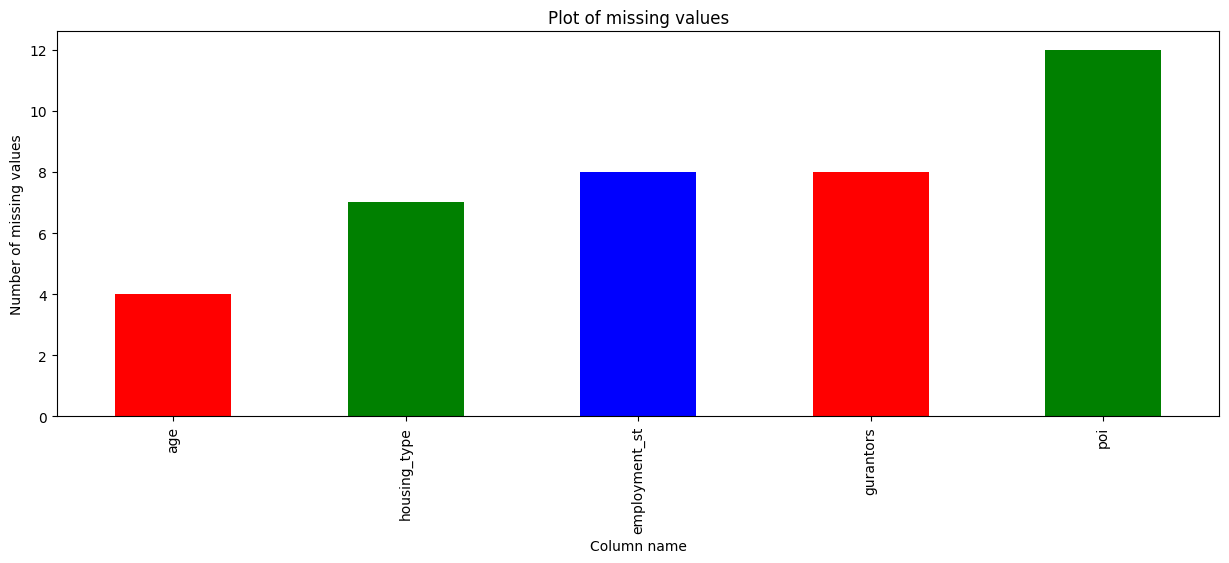

In [13]:
# Plot missing values
miss_value= credit_df1.isnull().sum()
miss_value= miss_value[miss_value > 0]
miss_value.sort_values(inplace=True)

plt.title("Plot of missing values")
plt.xlabel("Column name")
plt.ylabel("Number of missing values")

color = ['r', 'g', 'b']
miss_value.plot(kind="bar",color=color)

plt.show()

In [14]:
# Replacing all NA values for 'employment_st' with mode() of values in colomn 'employment_st'
credit_df1['employment_st'].fillna(credit_df1['employment_st'].mode()[0], inplace=True)
#Remove rows of features 'poi','age','gurantors','housing_type' where null value is present.
credit_df1.drop(credit_df1[credit_df1['poi'].isnull()].index, inplace=True)
credit_df1.drop(credit_df1[credit_df1['age'].isnull()].index, inplace=True)
credit_df1.drop(credit_df1[credit_df1['gurantors'].isnull()].index, inplace=True)
credit_df1.drop(credit_df1[credit_df1['housing_type'].isnull()].index, inplace=True)

credit_df1.isnull().sum()

account_info        0
duration_month      0
credit_history      0
purpose             0
savings_account     0
employment_st       0
poi                 0
personal_status     0
gurantors           0
resident_since      0
property_type       0
age                 0
installment_type    0
housing_type        0
credits_no          0
job_type            0
liables             0
telephone           0
foreigner           0
Group_no            0
dtype: int64

<AxesSubplot: >

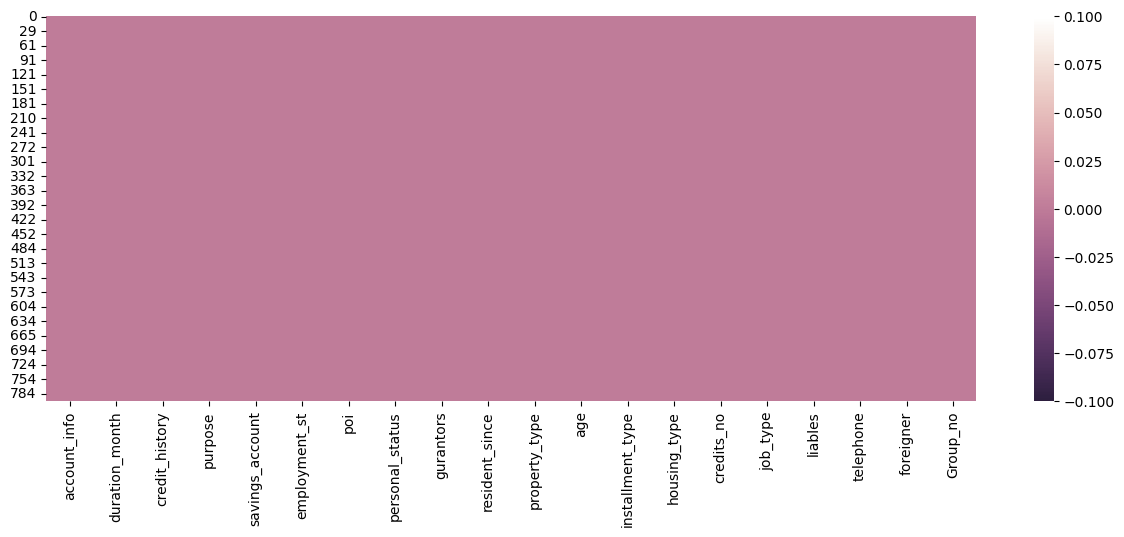

In [15]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True, reverse=True)
sns.heatmap(credit_df1.isnull(), cmap=cmap)

missing values handled.

In [16]:
credit_df2=credit_df1.copy()

In [17]:
credit_df2.shape

(769, 20)

In [18]:
#Checking whether duplicate values are there in the dataset
# Check for duplicates
duplicates = credit_df2.duplicated()

# Print the duplicate rows
print(credit_df2[duplicates])

    account_info  duration_month credit_history purpose savings_account  \
320          A12              30            A34     A40             A61   
743          A11              24            A31     A42             A63   

    employment_st  poi personal_status gurantors  resident_since  \
320           A71  4.0             A94      A101               2   
743           A73  4.0             A93      A101               4   

    property_type   age installment_type housing_type  credits_no job_type  \
320          A123  28.0             A143         A152           2     A174   
743          A121  22.0             A142         A152           1     A173   

     liables telephone foreigner Group_no  
320        1      A191      A201        1  
743        1      A192      A201        2  


In [19]:
# Remove duplicates
credit_df2.drop_duplicates(inplace = True)
credit_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 767 entries, 0 to 799
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   account_info      767 non-null    object 
 1   duration_month    767 non-null    int64  
 2   credit_history    767 non-null    object 
 3   purpose           767 non-null    object 
 4   savings_account   767 non-null    object 
 5   employment_st     767 non-null    object 
 6   poi               767 non-null    float64
 7   personal_status   767 non-null    object 
 8   gurantors         767 non-null    object 
 9   resident_since    767 non-null    int64  
 10  property_type     767 non-null    object 
 11  age               767 non-null    float64
 12  installment_type  767 non-null    object 
 13  housing_type      767 non-null    object 
 14  credits_no        767 non-null    int64  
 15  job_type          767 non-null    object 
 16  liables           767 non-null    int64  
 1

Two rows removed.Duplicate values handled.

Handling Outliers

In [20]:
numerical = credit_df2.select_dtypes([np.number]).columns
numerical

Index(['duration_month', 'poi', 'resident_since', 'age', 'credits_no',
       'liables'],
      dtype='object')

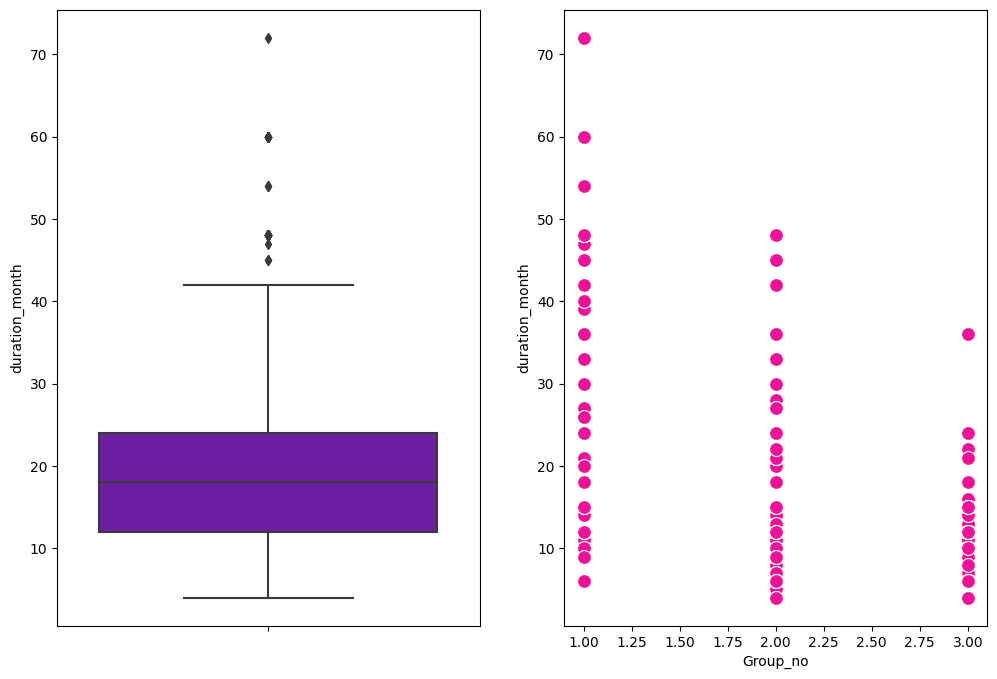

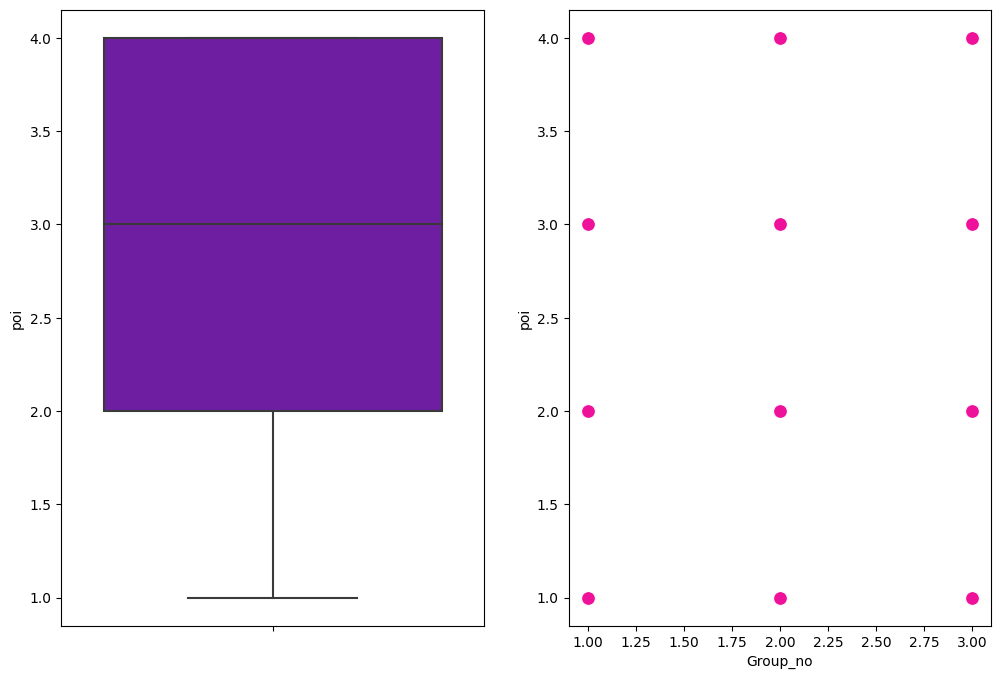

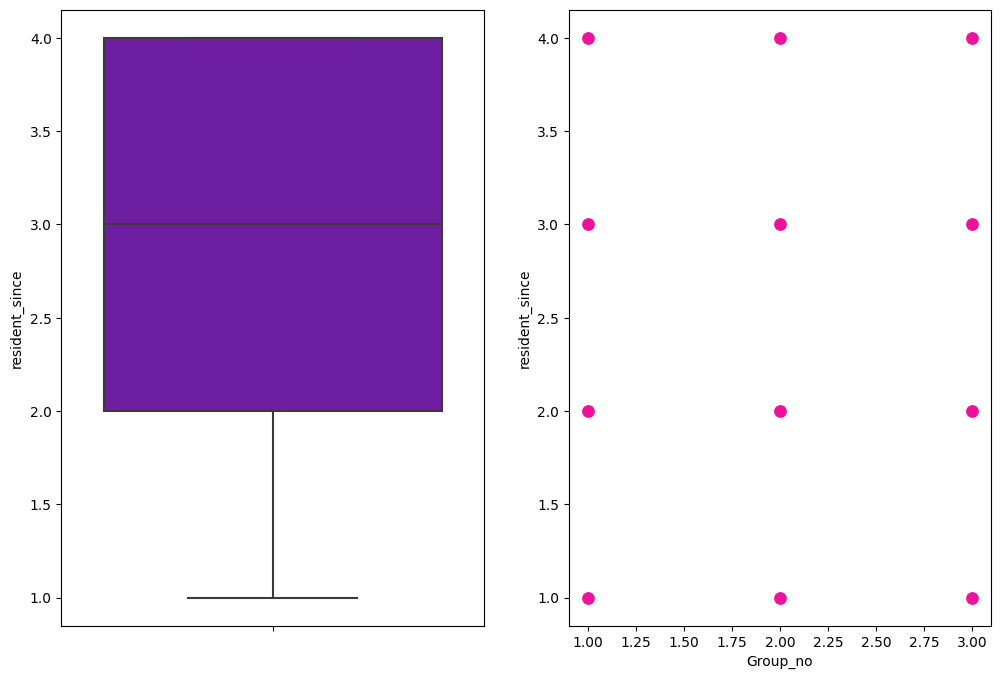

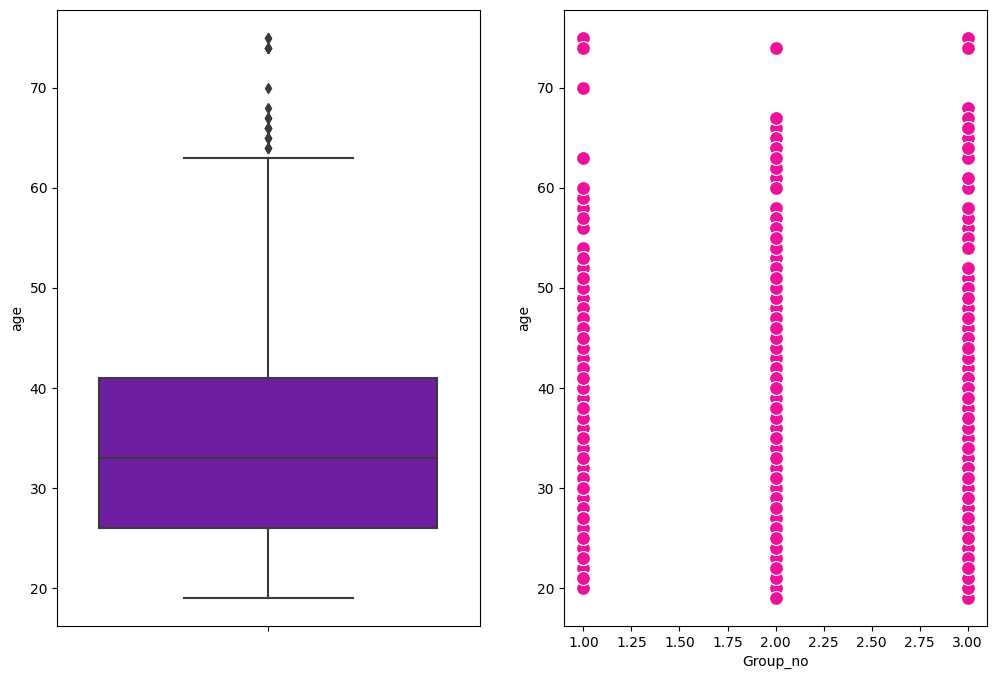

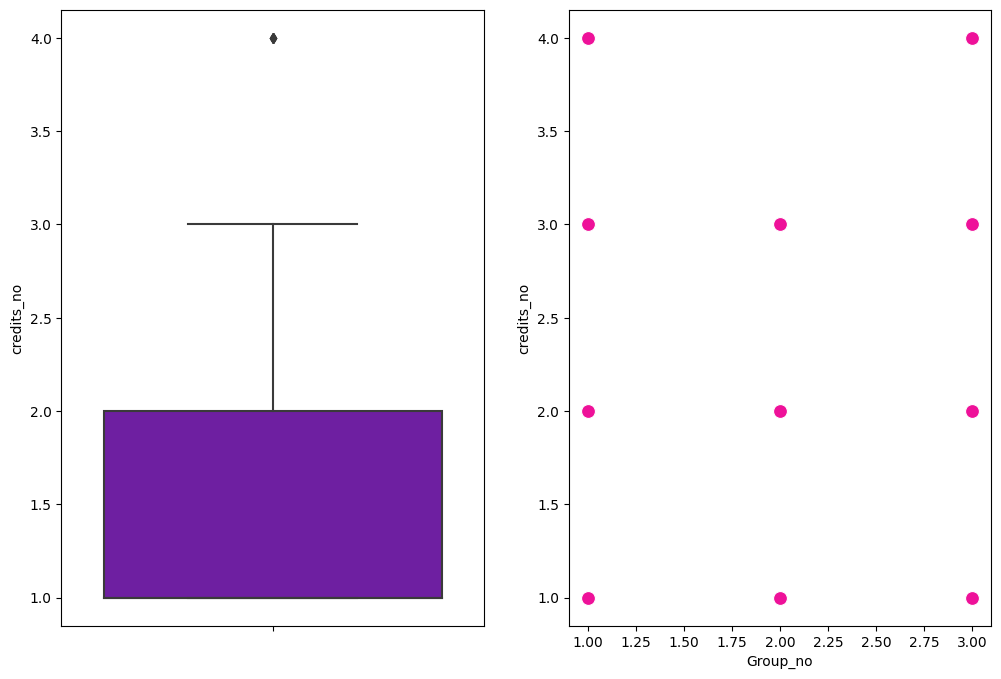

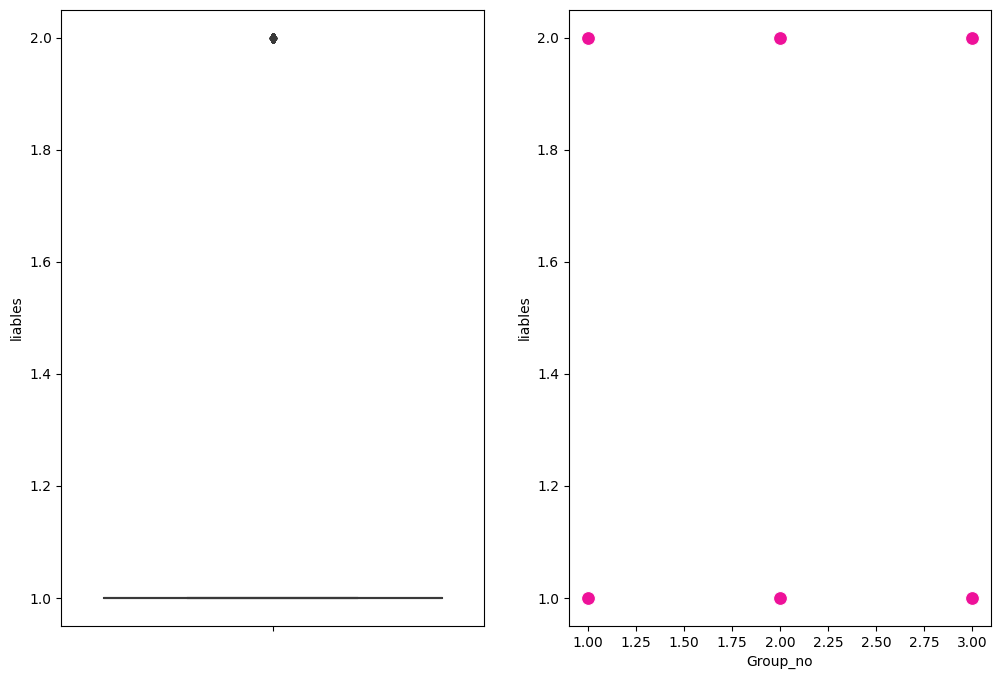

In [21]:
for col in numerical:
    fig, ax =plt.subplots(1,2, figsize=(12,8))
    sns.boxplot(data=credit_df2, y=col, ax=ax[0], color='#7209b7')
    sns.scatterplot(data=credit_df2,x = 'Group_no', s = 100, y=col, ax=ax[1], color ='#ee1199')
    plt.show()

In [22]:
#Handling age outlier values
((credit_df2['age'] <= 60) & (credit_df2['age'] >= 18)).value_counts()

True     730
False     37
Name: age, dtype: int64

In [23]:
credit_df2 = credit_df2[(credit_df2['age'] <= 60) & (credit_df2['age'] >= 18)]

In [24]:
#Handling duration_month values
(credit_df2['duration_month'] <35).value_counts()

True     605
False    125
Name: duration_month, dtype: int64

In [25]:
credit_df2 = credit_df2[(credit_df2['duration_month'] <= 35)]

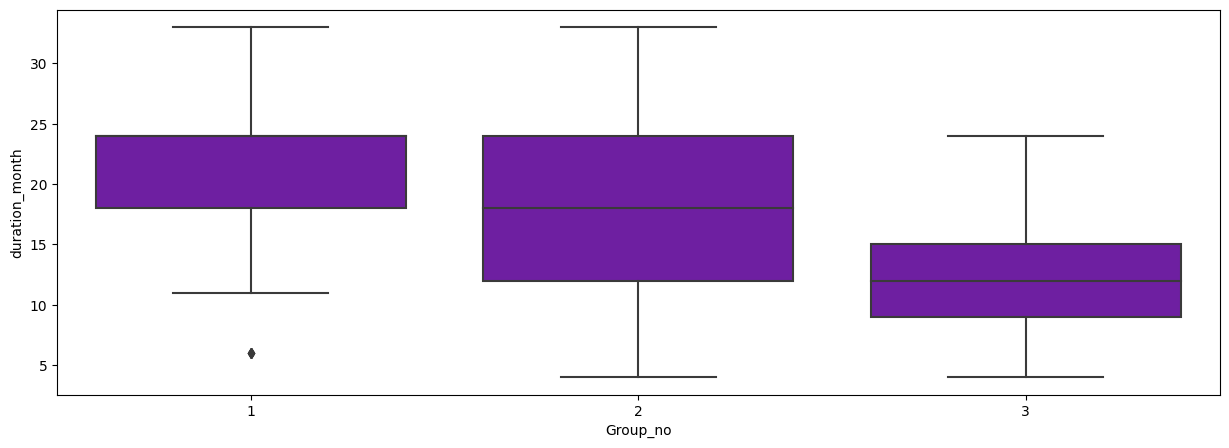

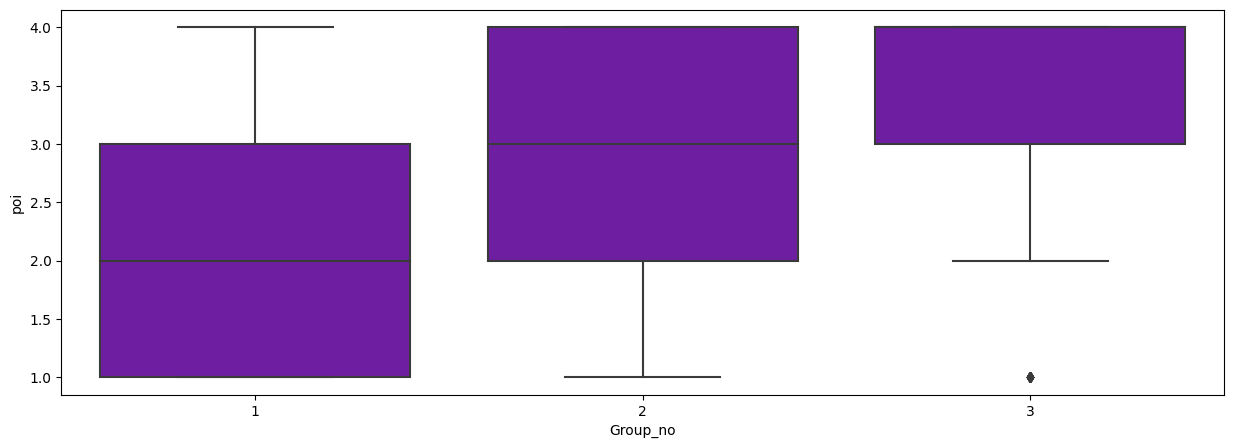

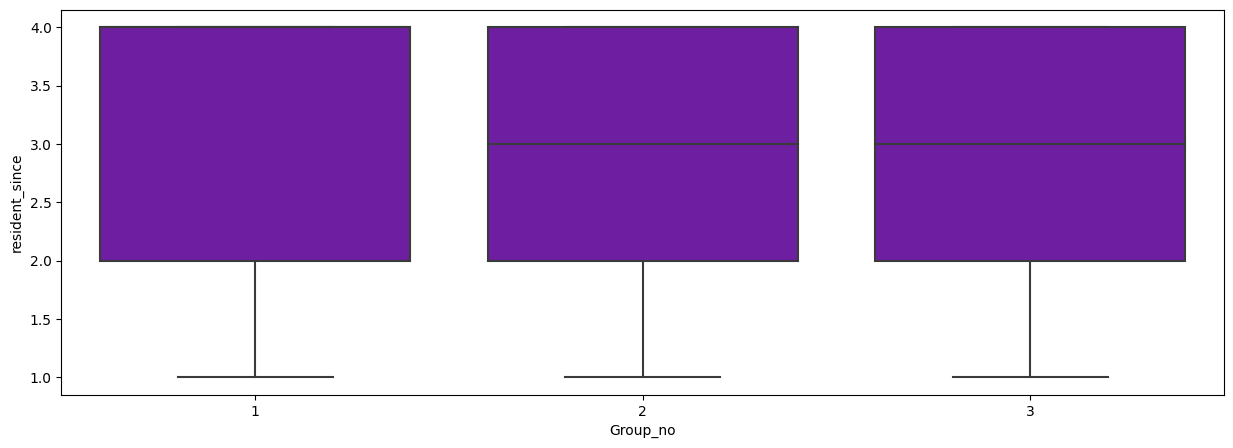

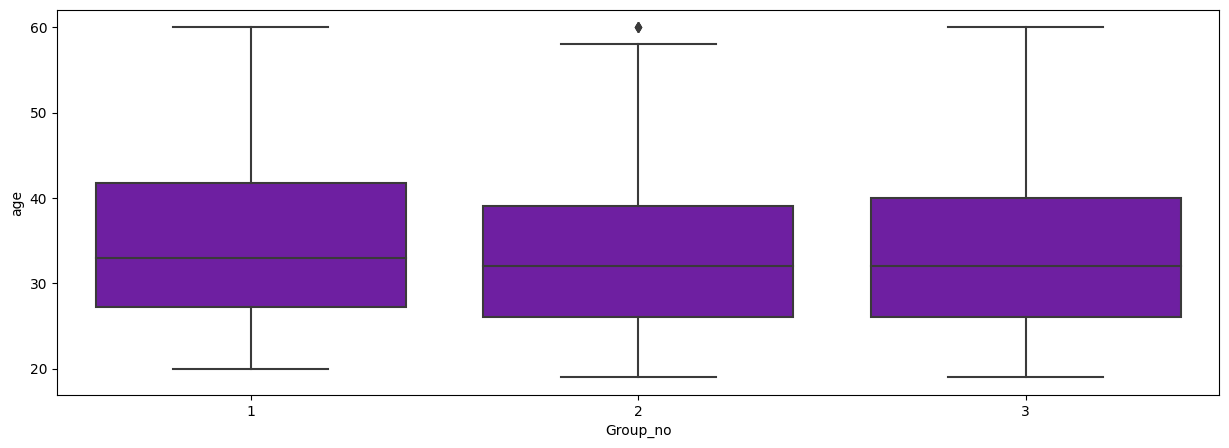

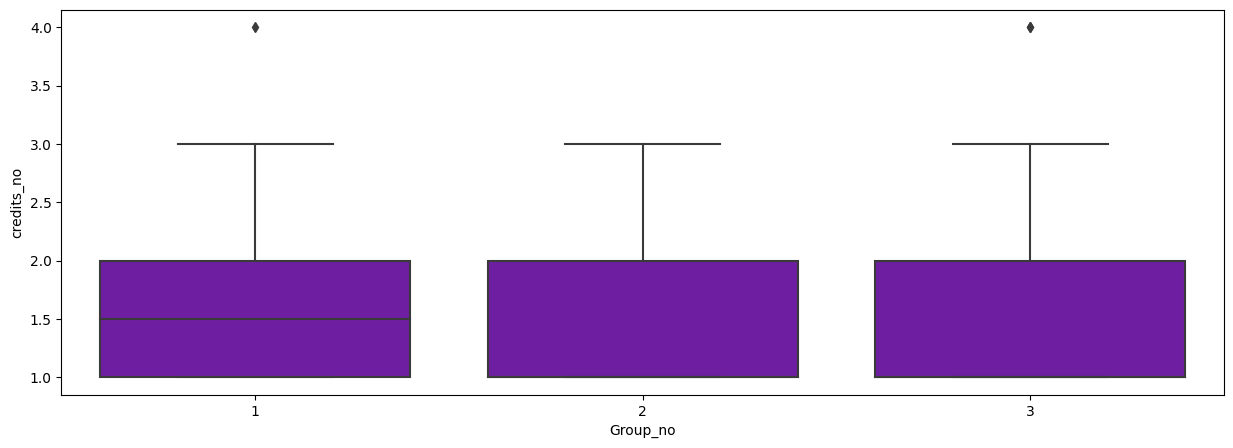

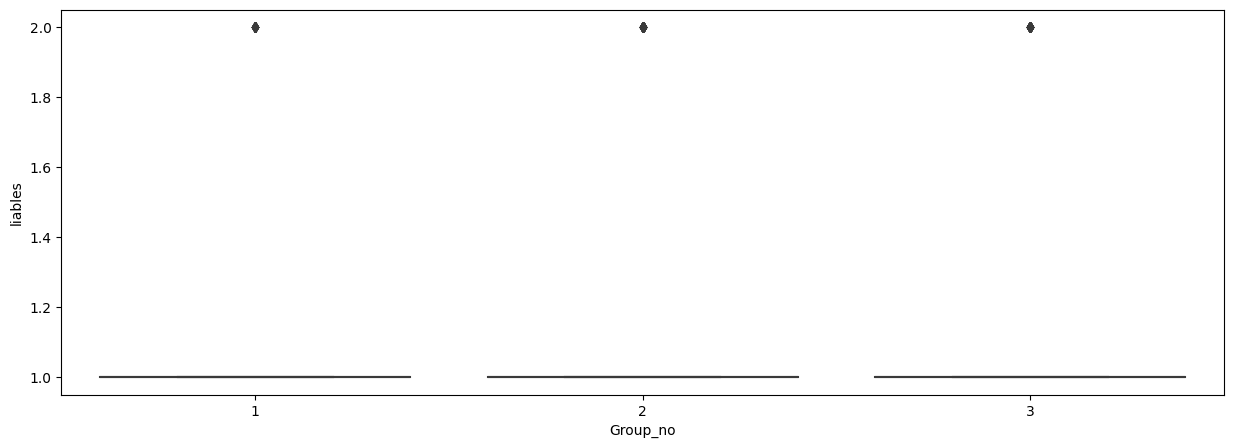

In [26]:
for col in numerical:    
    sns.boxplot(data=credit_df2, x = 'Group_no',y=col,color='#7209b7')    
    plt.show()

In [27]:
#Analysing values in target column
# Count the occurrences of each unique value in the 'Group_no' column
value_counts =credit_df2 .Group_no.value_counts()

# Print the counts for each unique value in the 'Group_no' column
print(value_counts)

2    285
3    226
1     94
Name: Group_no, dtype: int64


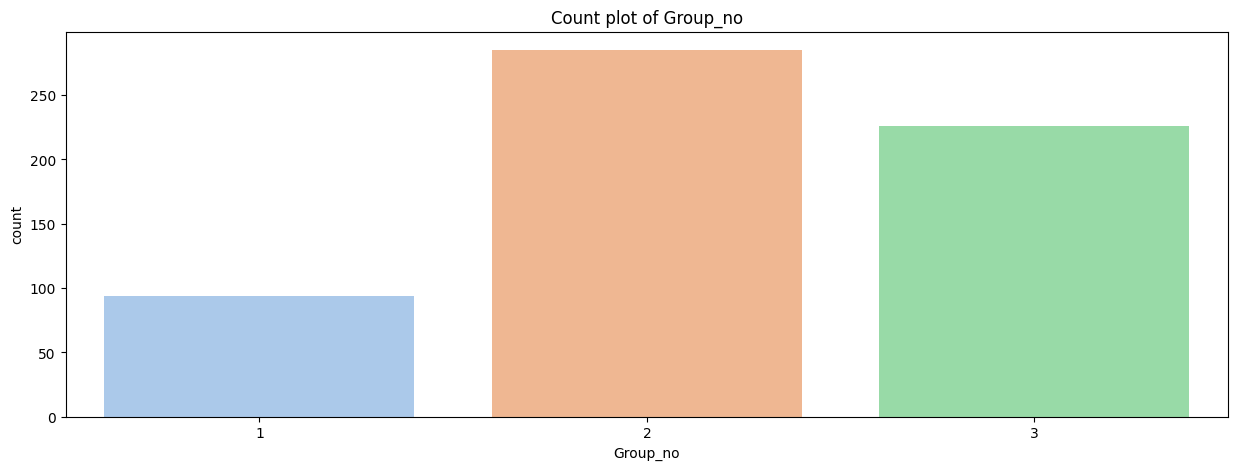

In [28]:
sns.countplot(x="Group_no", data=credit_df2 ,palette='pastel')
plt.title('Count plot of Group_no')
plt.show()

There are three unique groups-1,2,3.There are more in group3.But still data looks balanced.

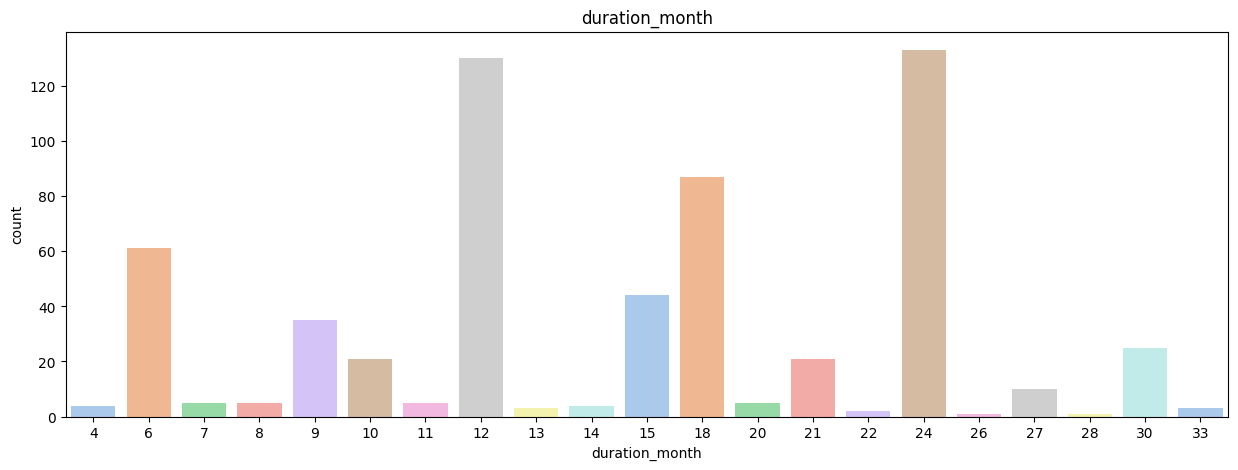

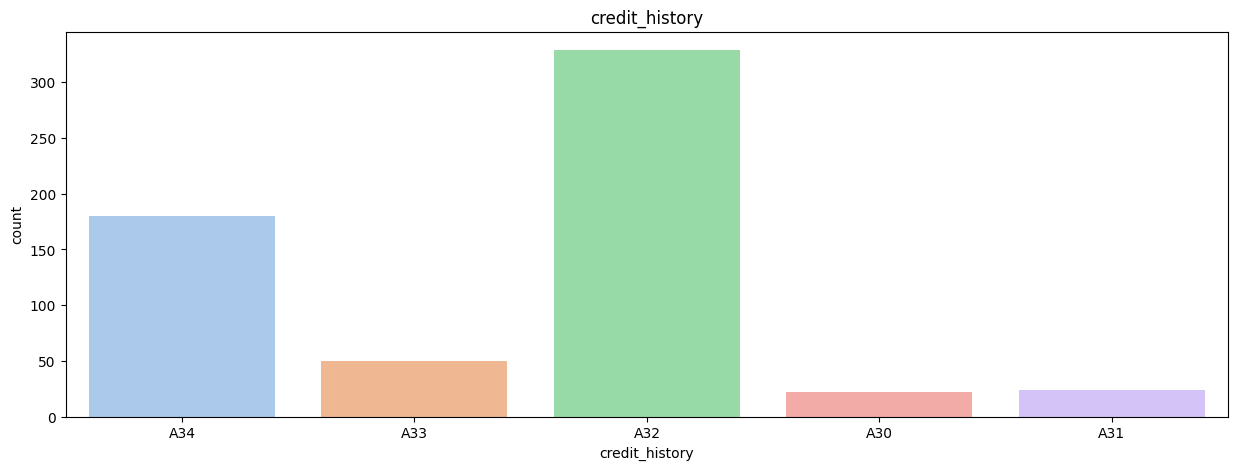

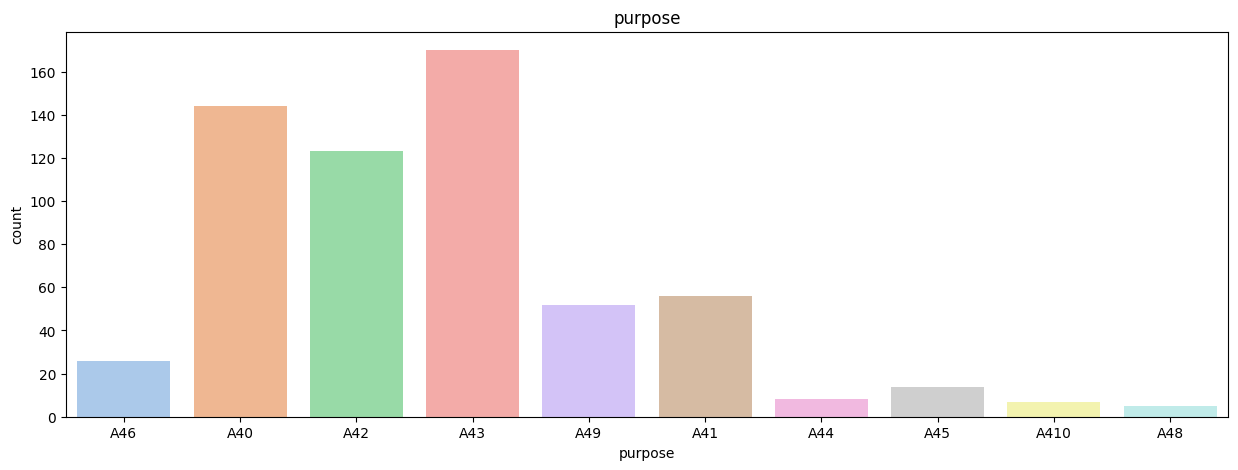

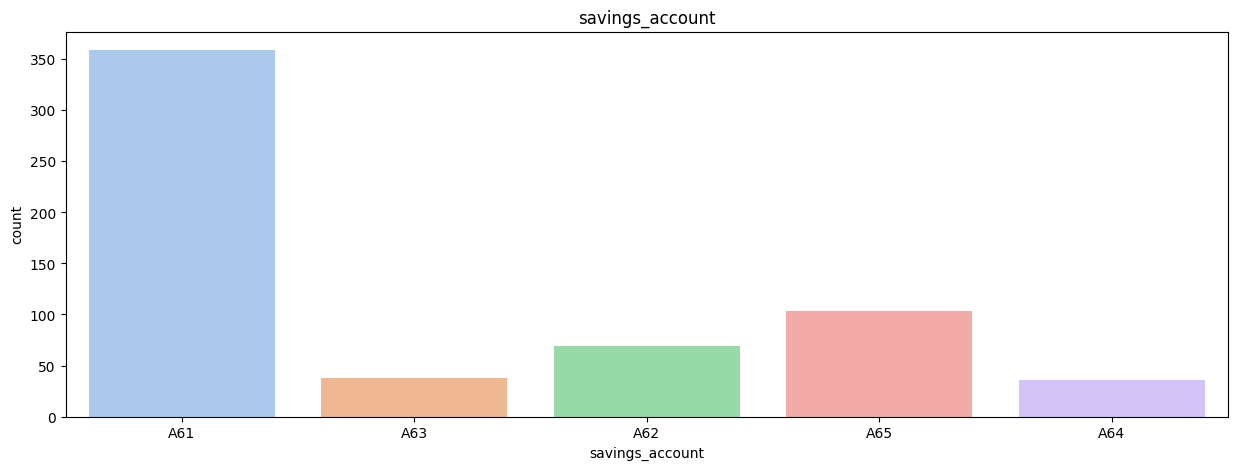

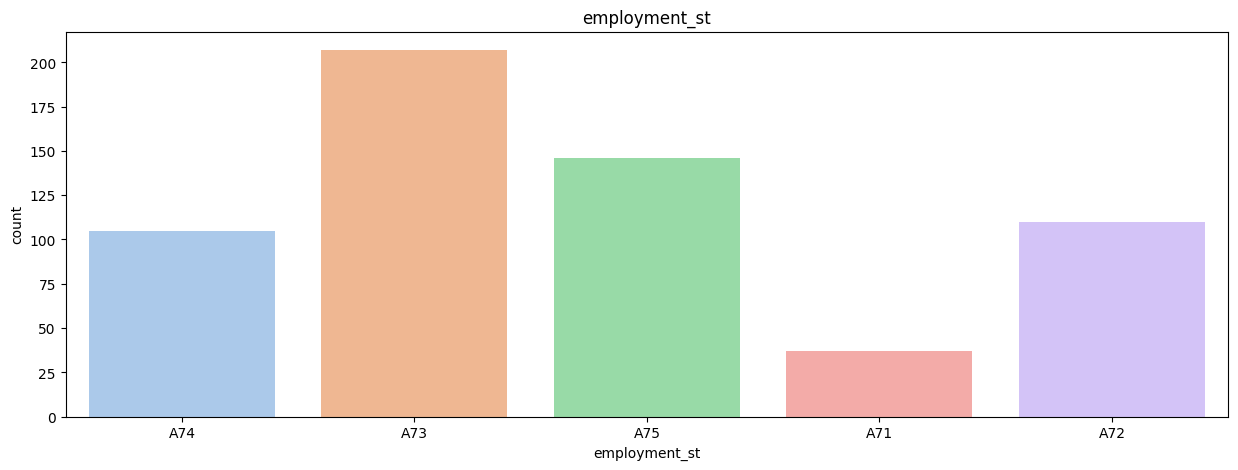

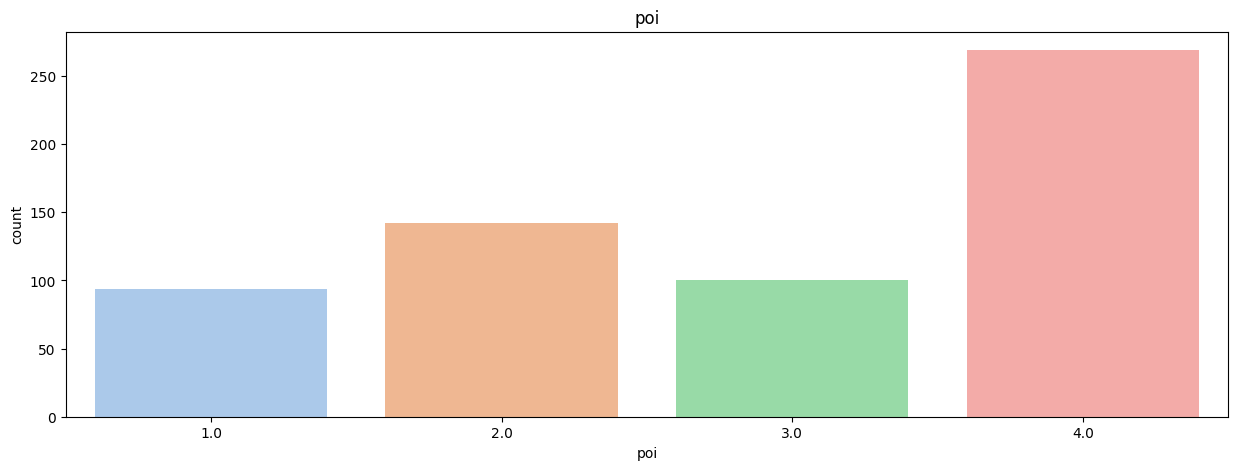

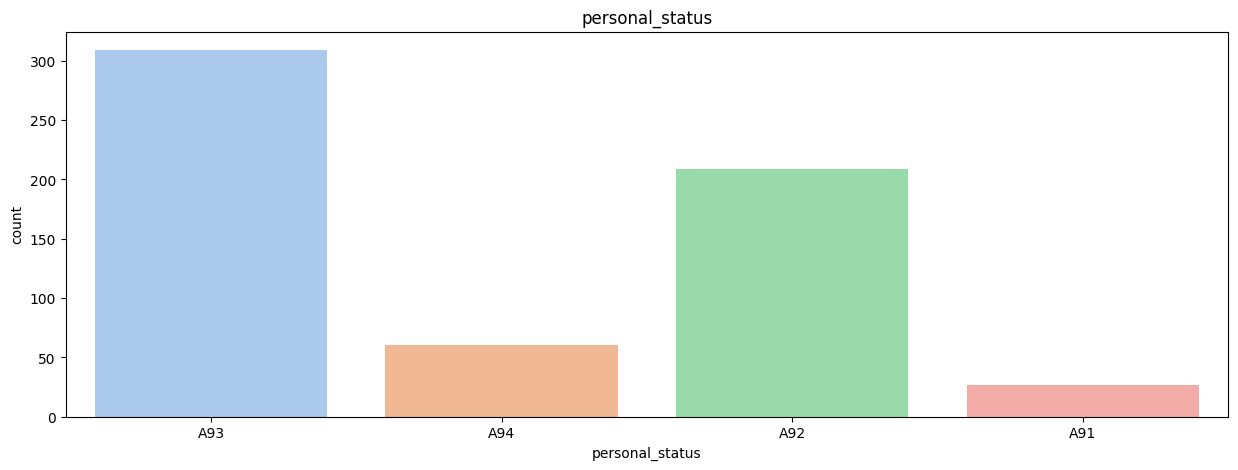

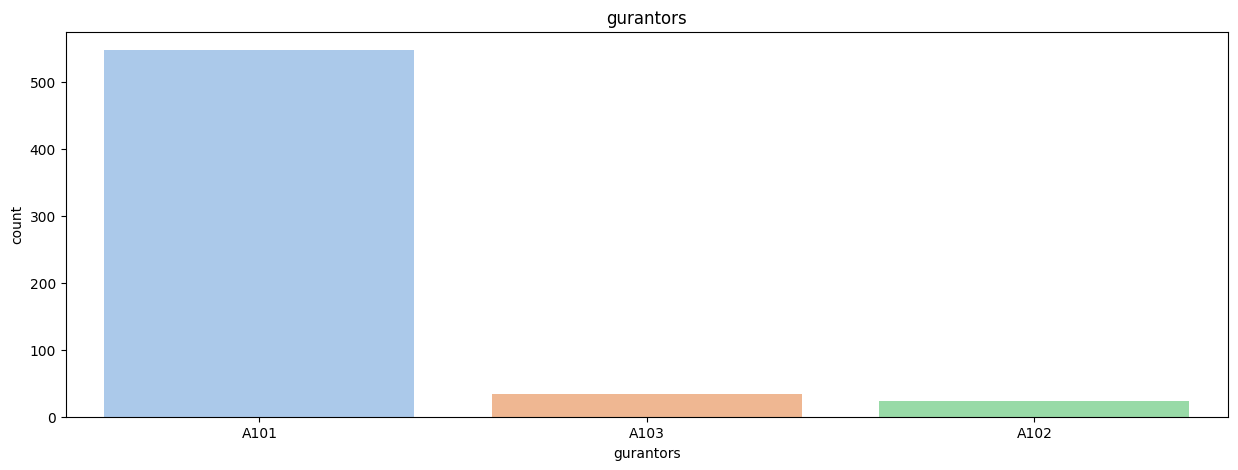

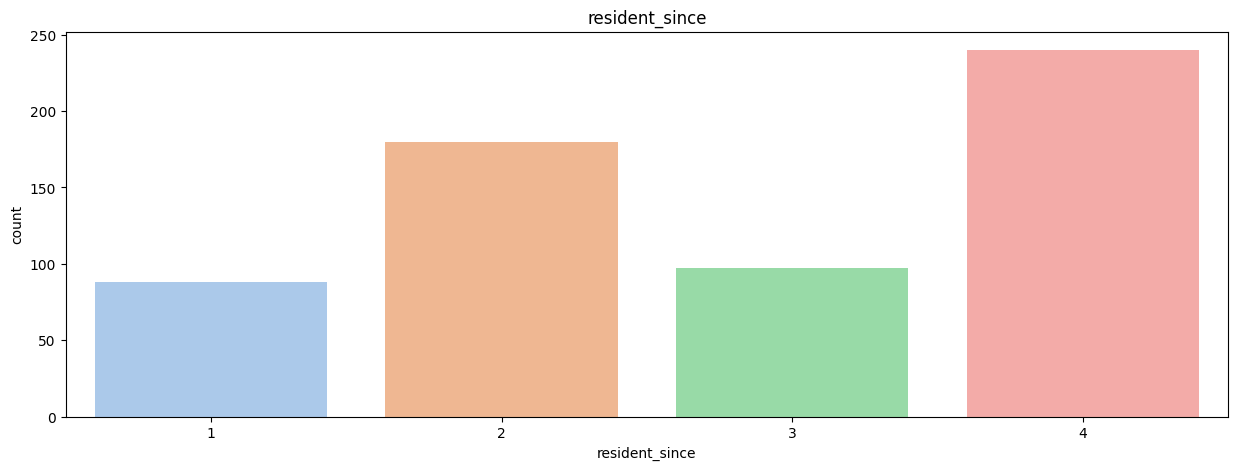

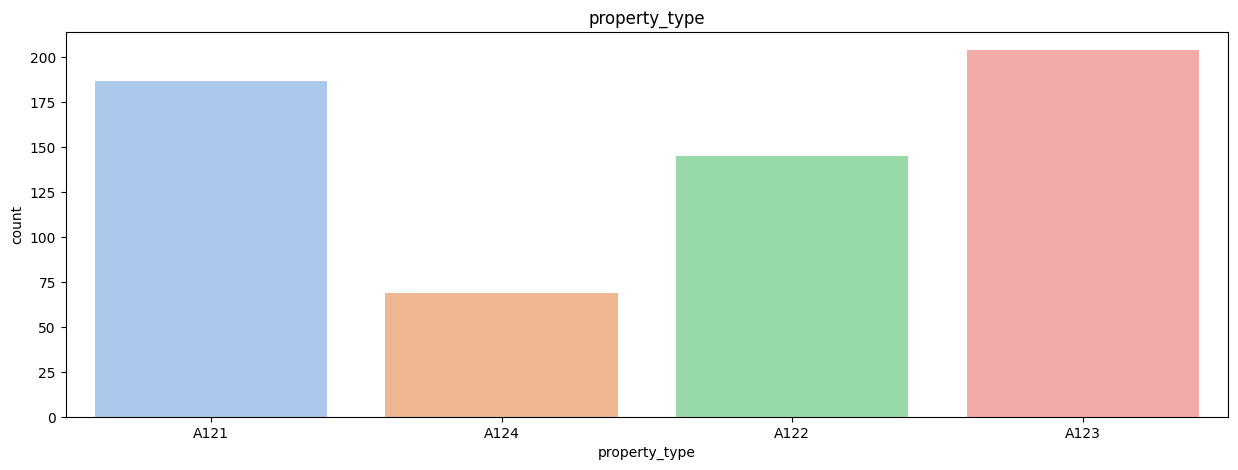

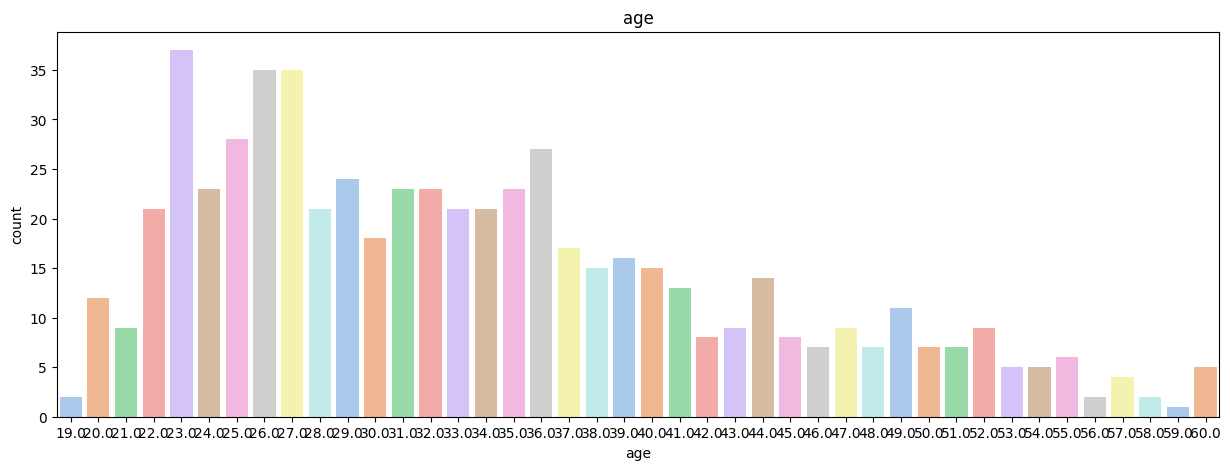

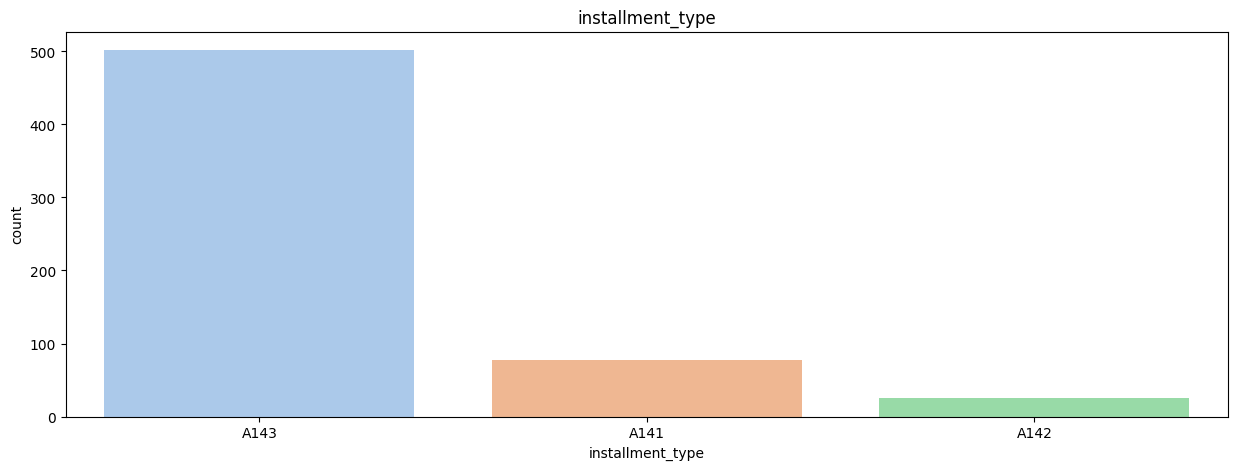

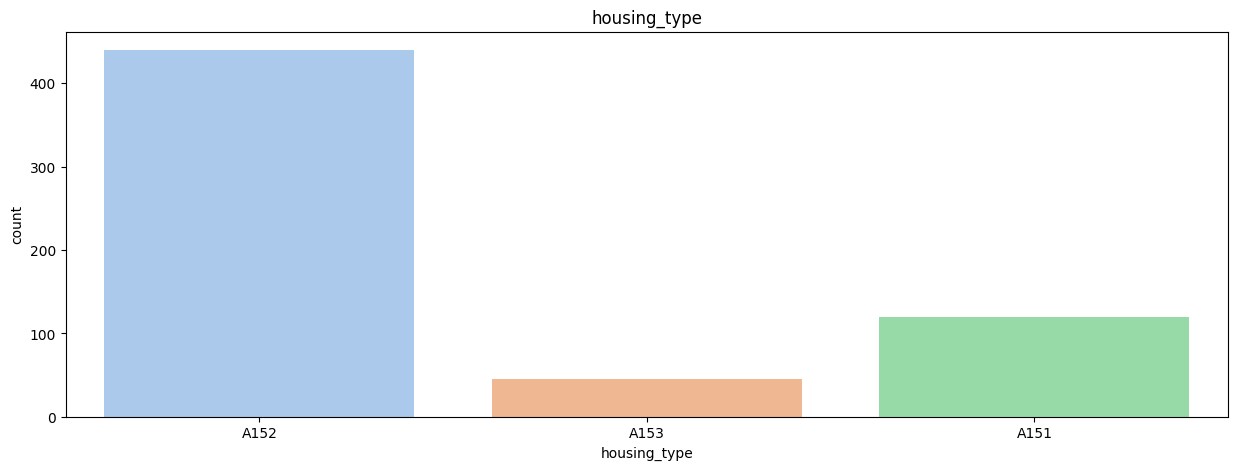

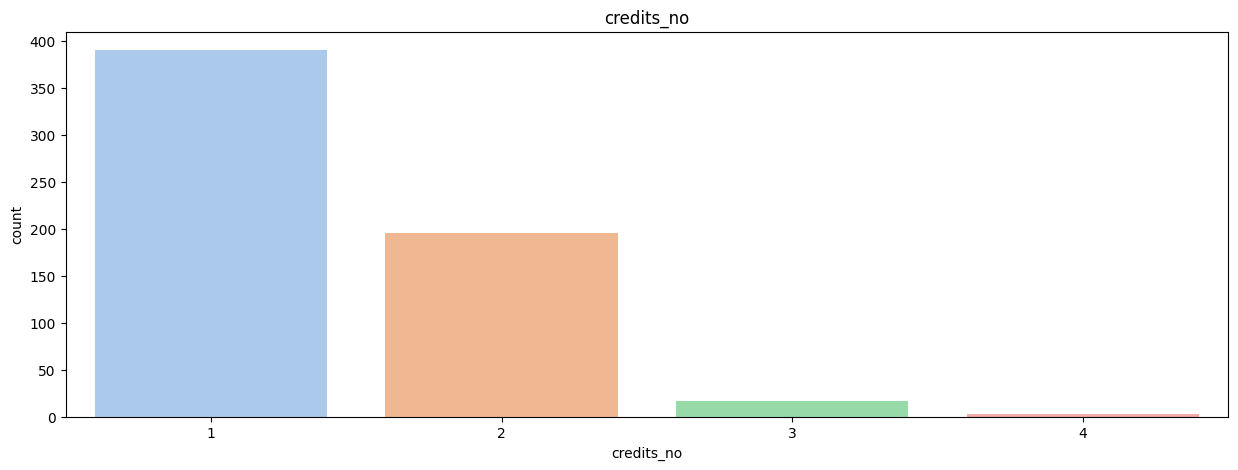

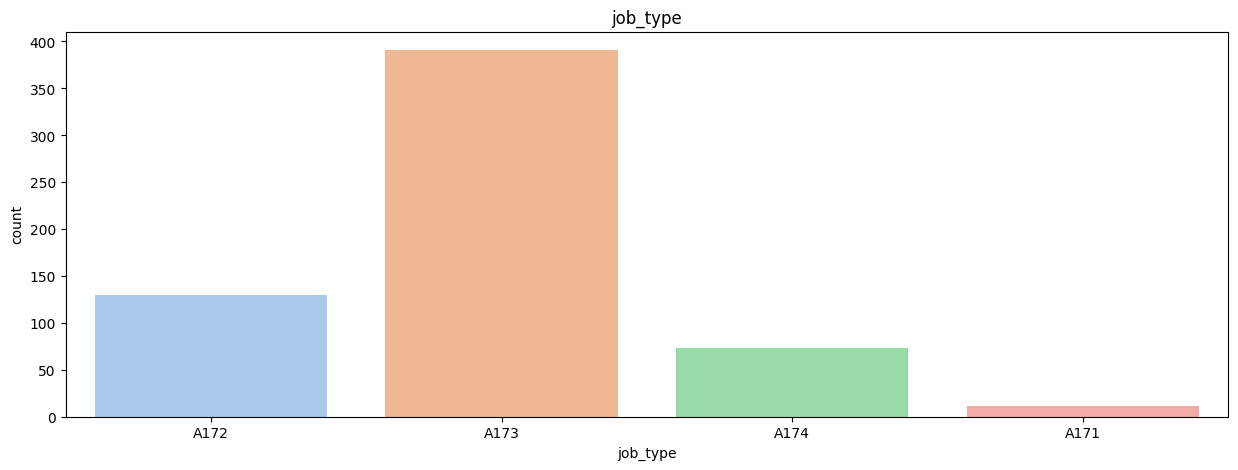

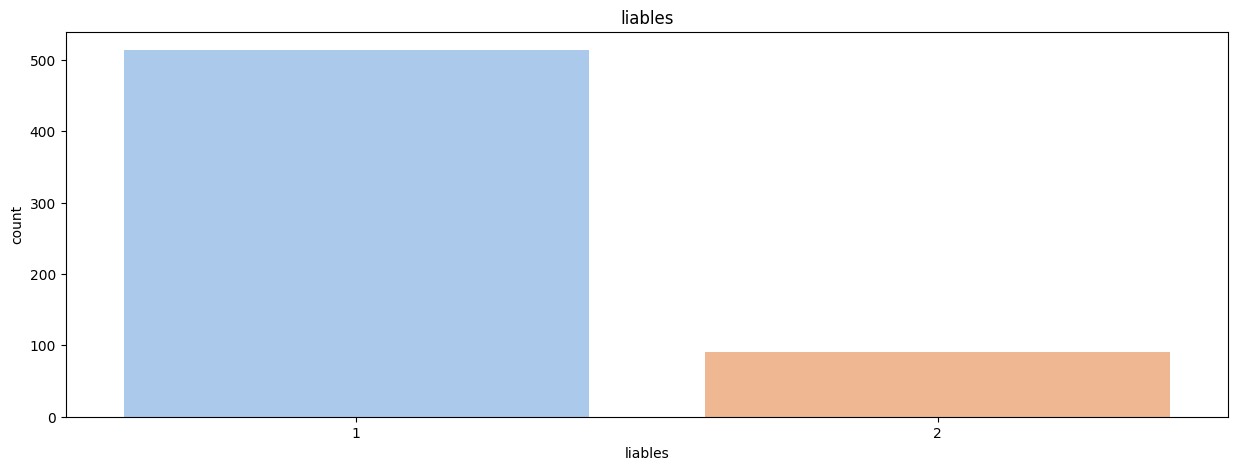

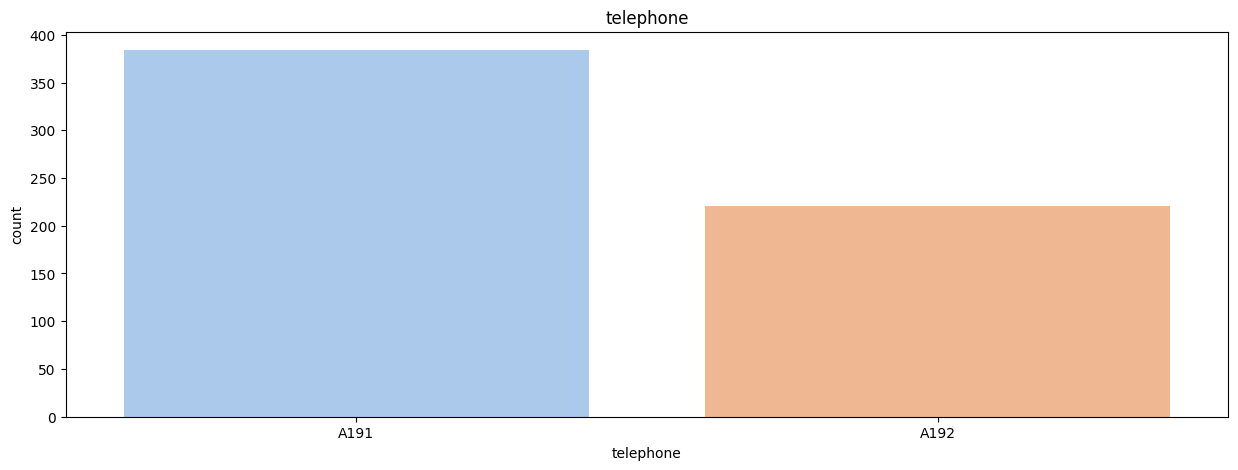

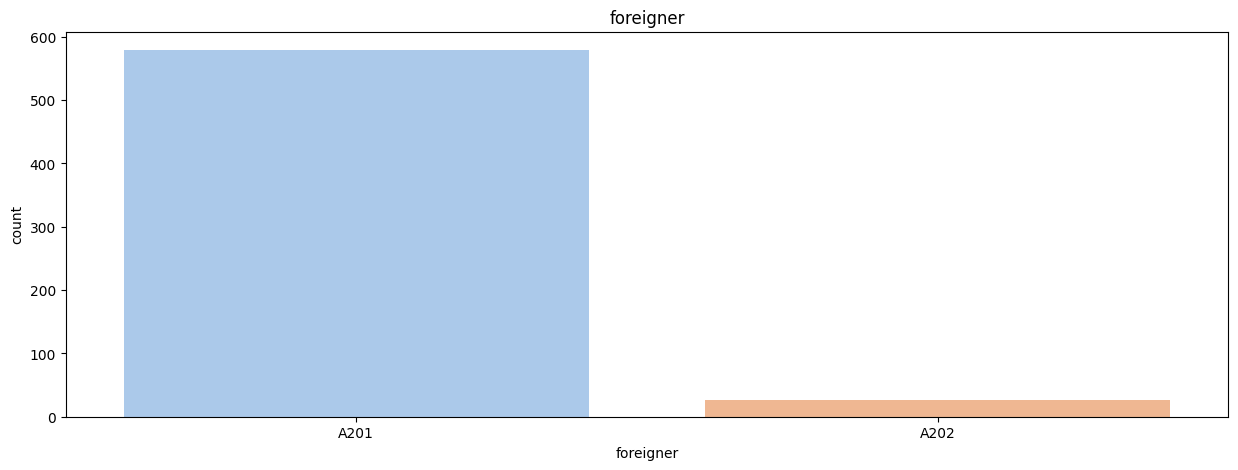

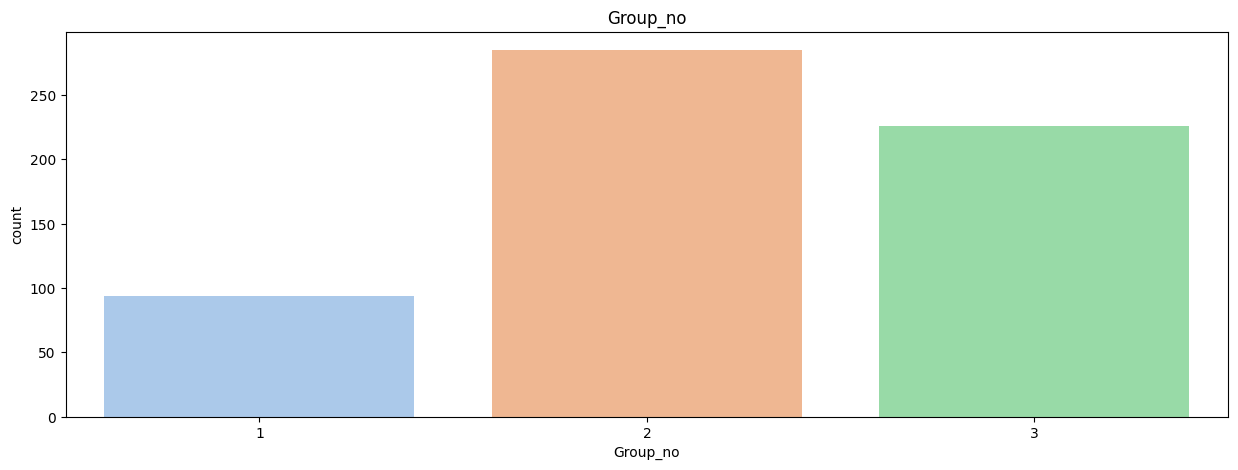

In [29]:
#countplot of all columns
for i in credit_df2.columns[1:]:
    plt.figure(figsize = (15, 5))
    sns.countplot(x=i,data=credit_df2,palette="pastel")
    plt.title(i)
    plt.show()

duration_month


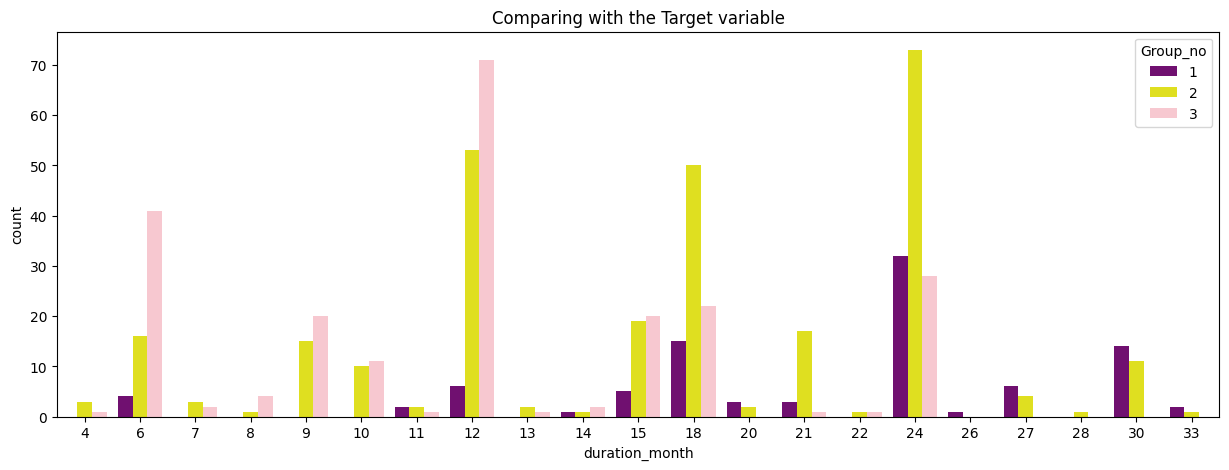

credit_history


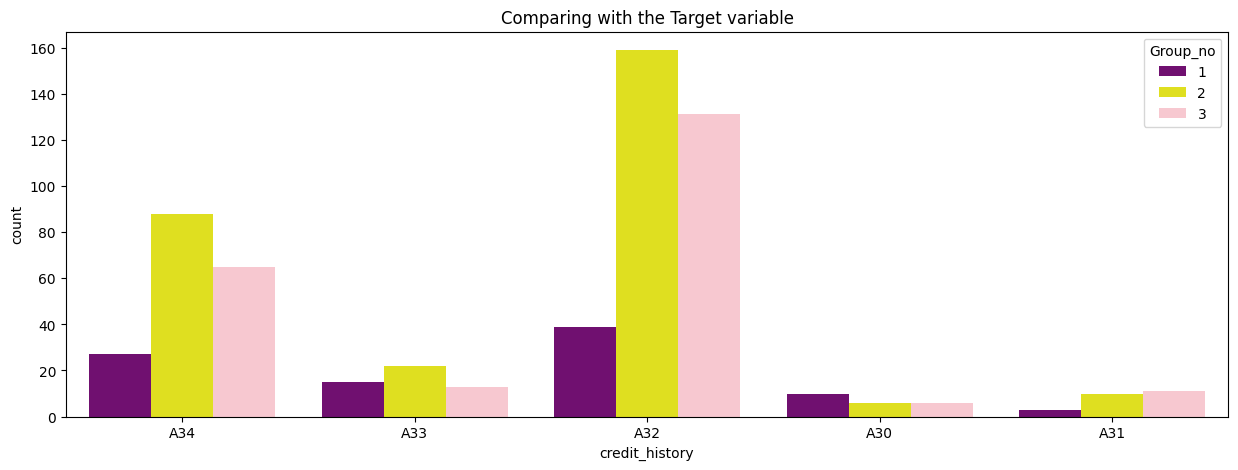

purpose


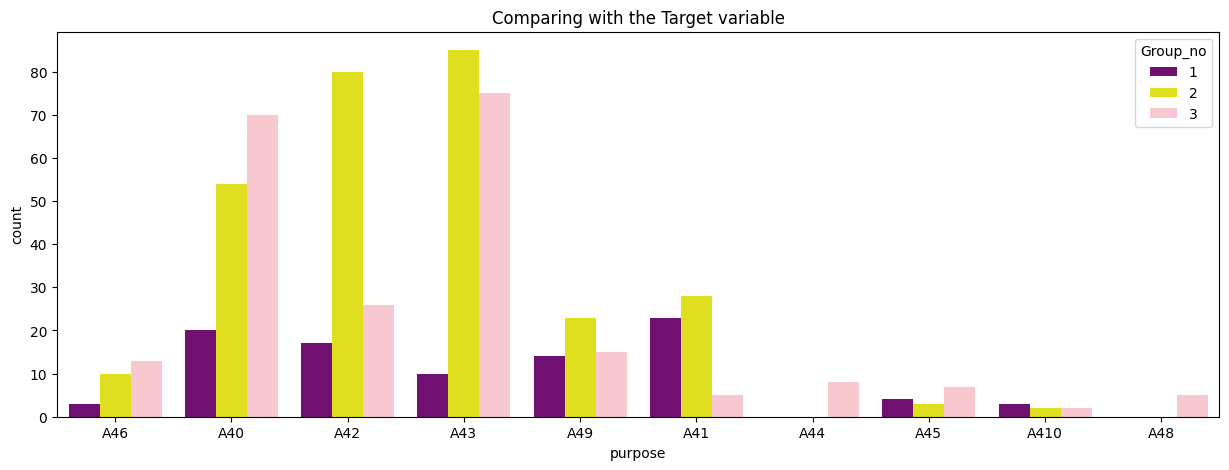

savings_account


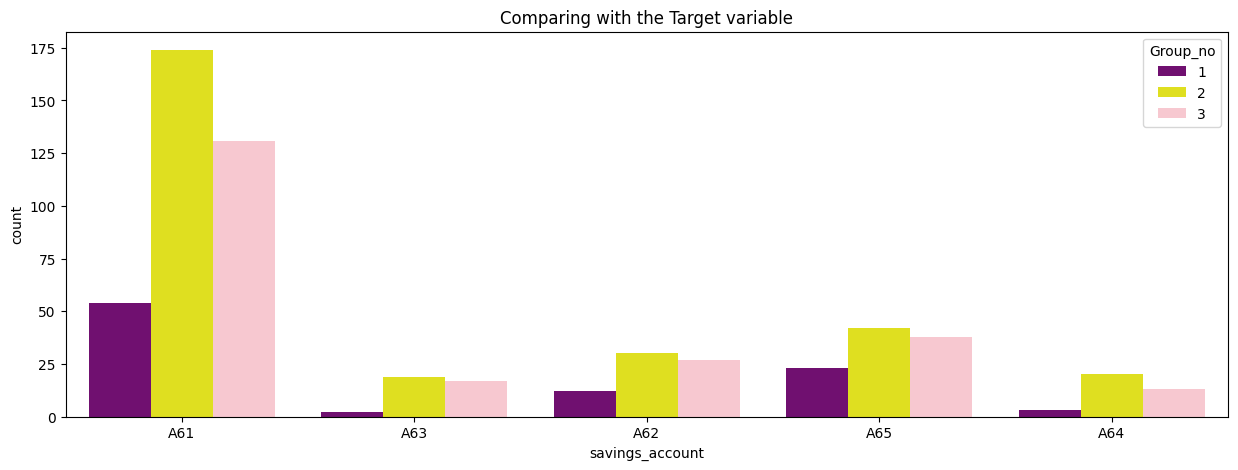

employment_st


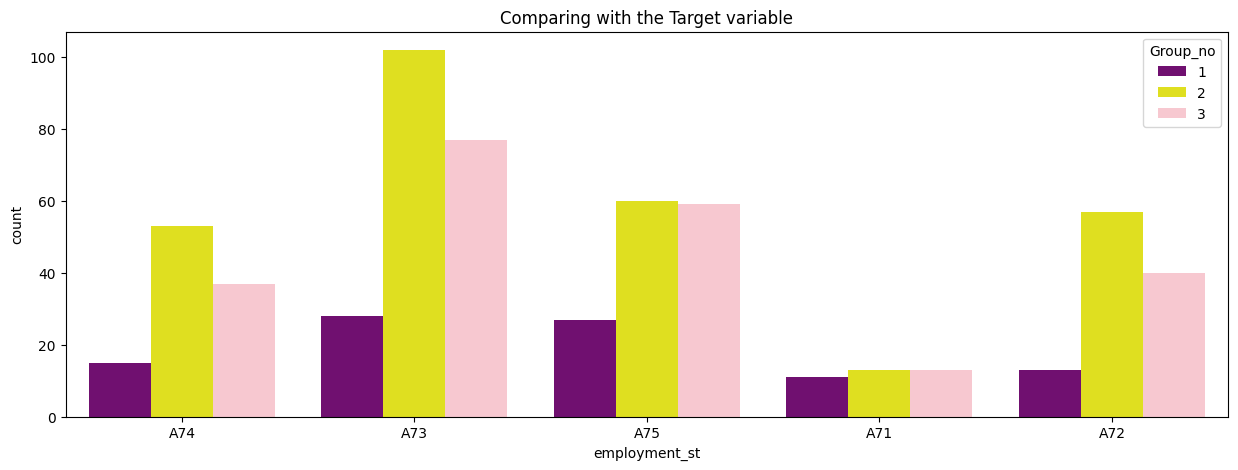

poi


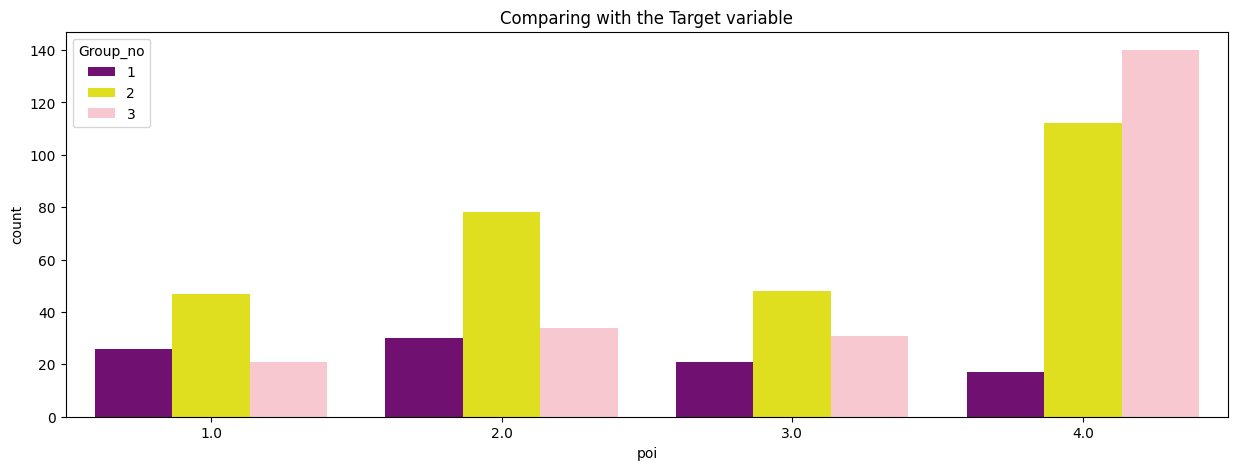

personal_status


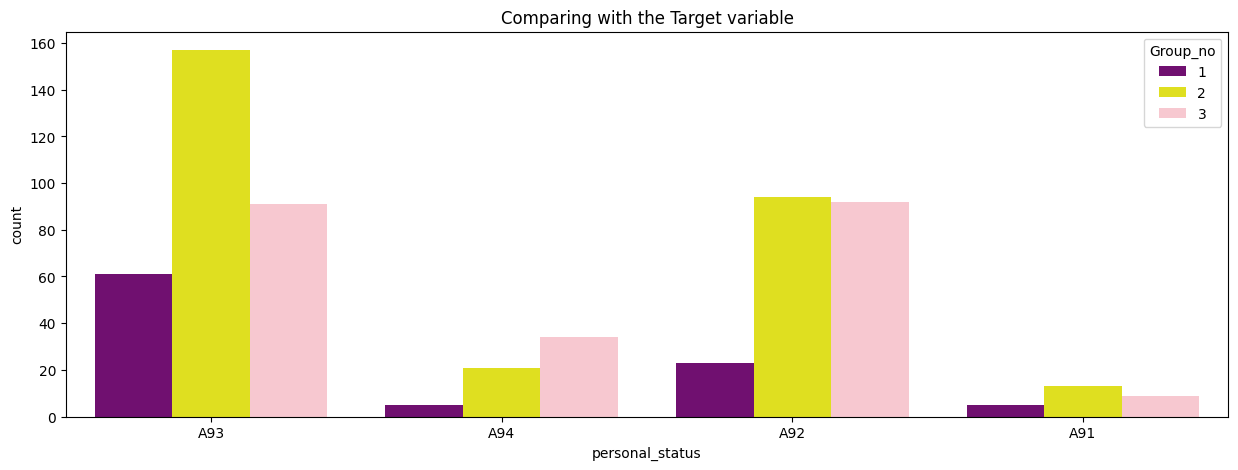

gurantors


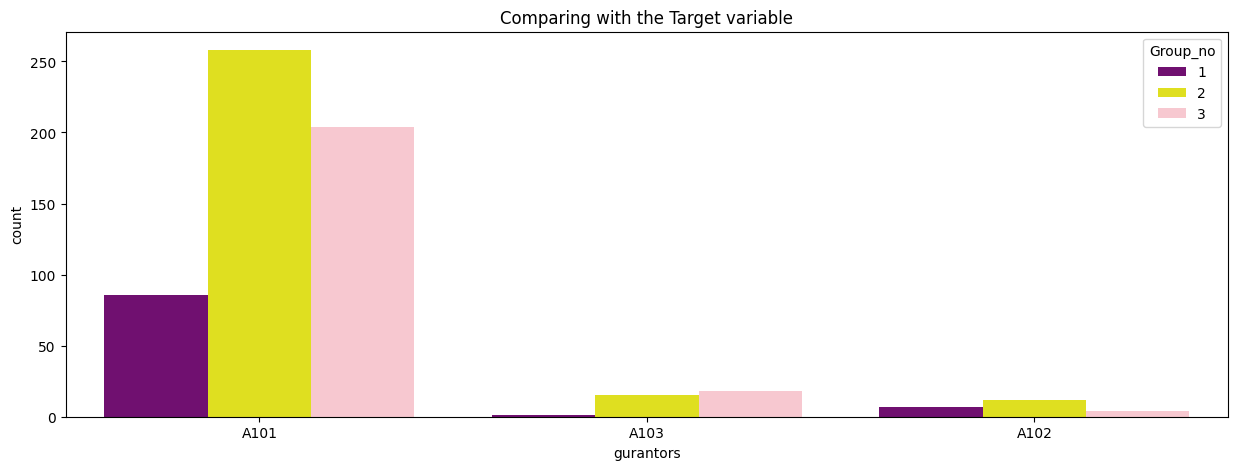

resident_since


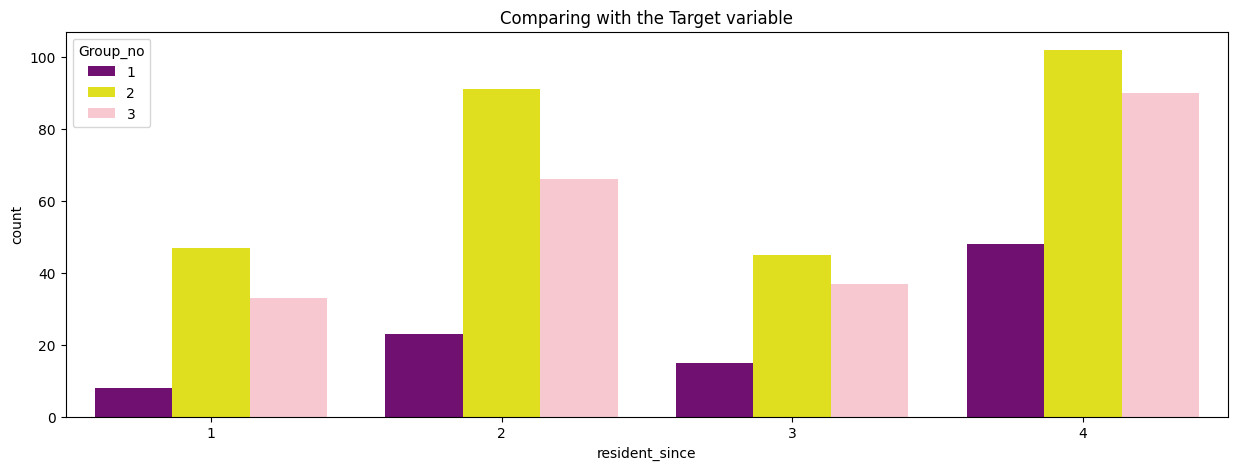

property_type


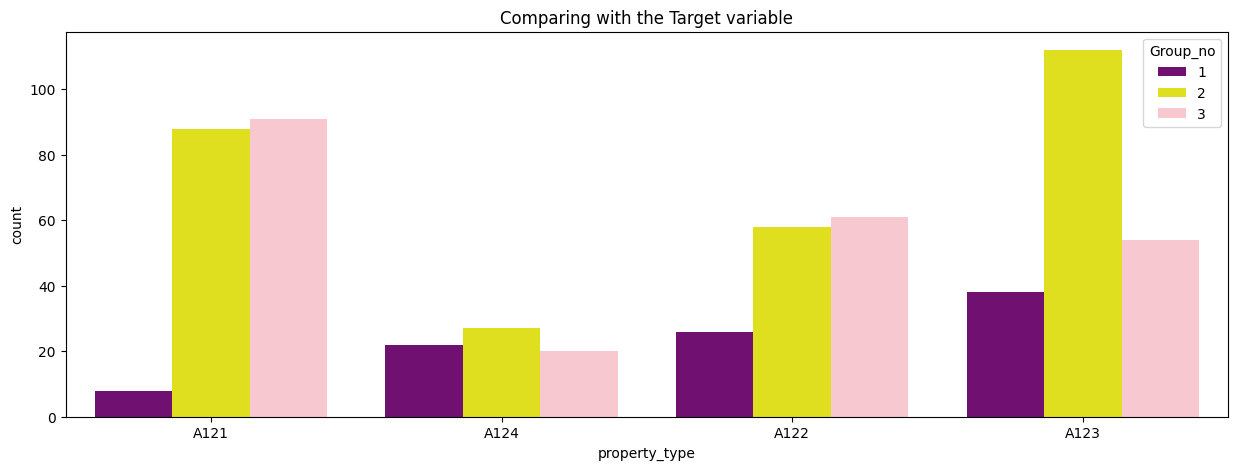

age


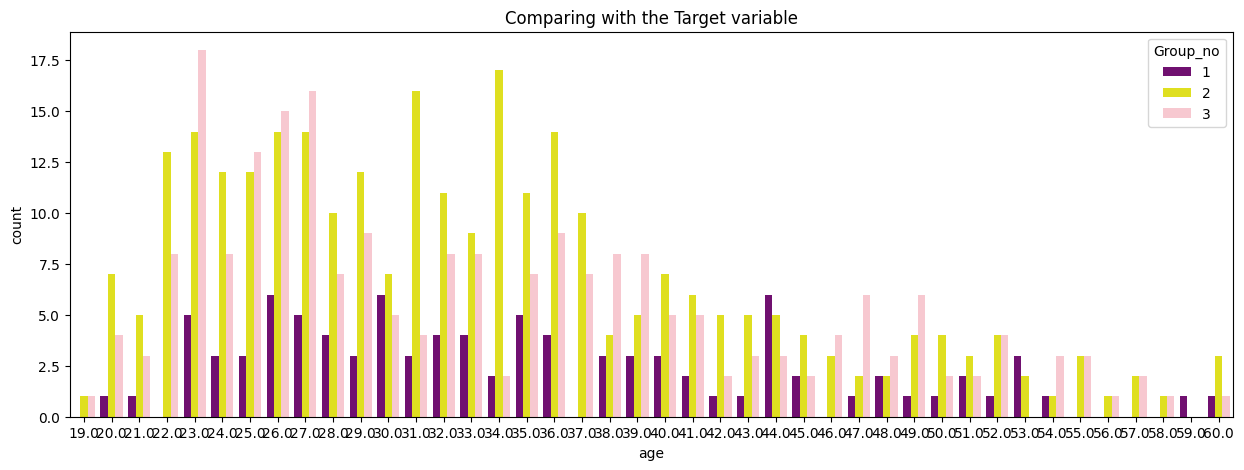

installment_type


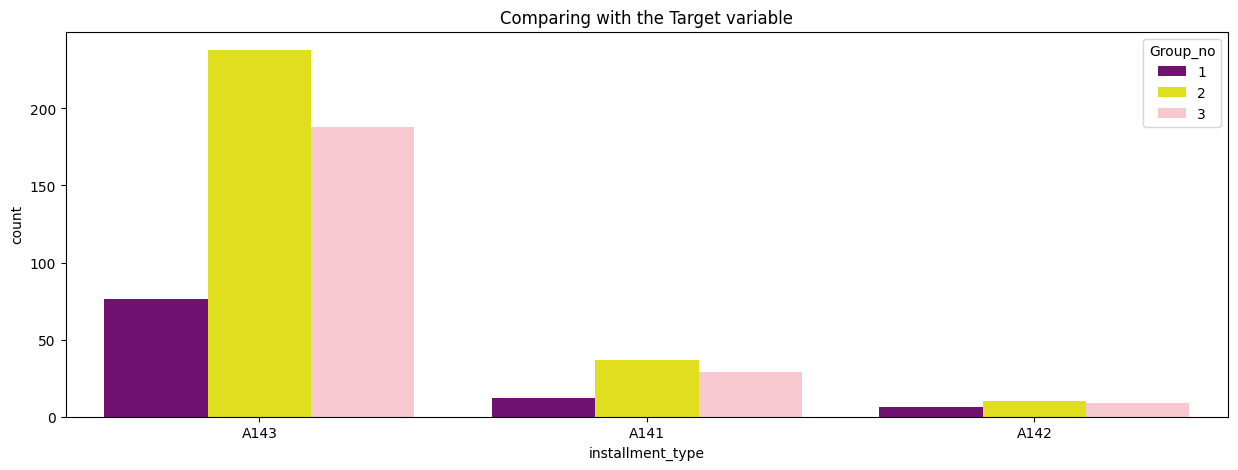

housing_type


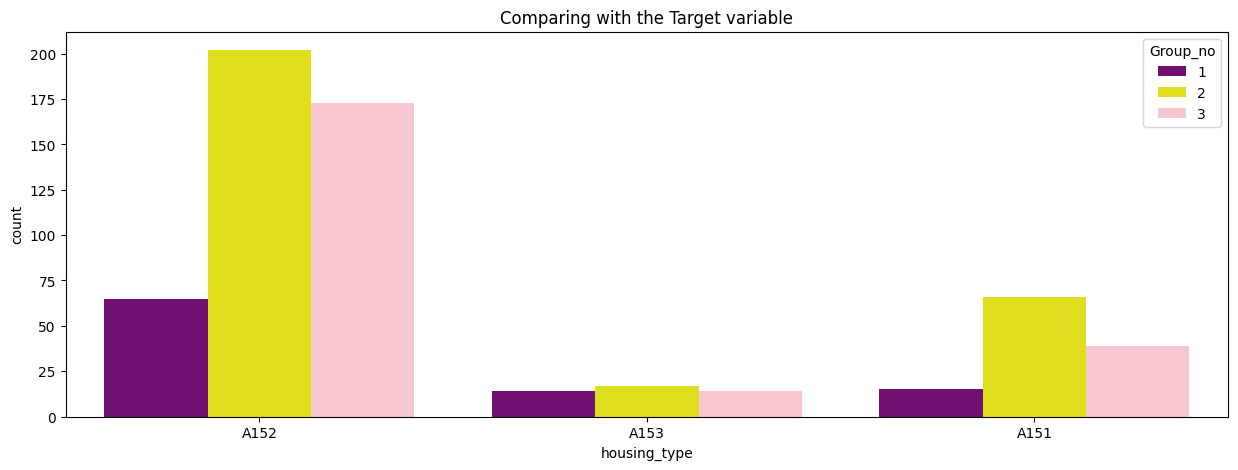

credits_no


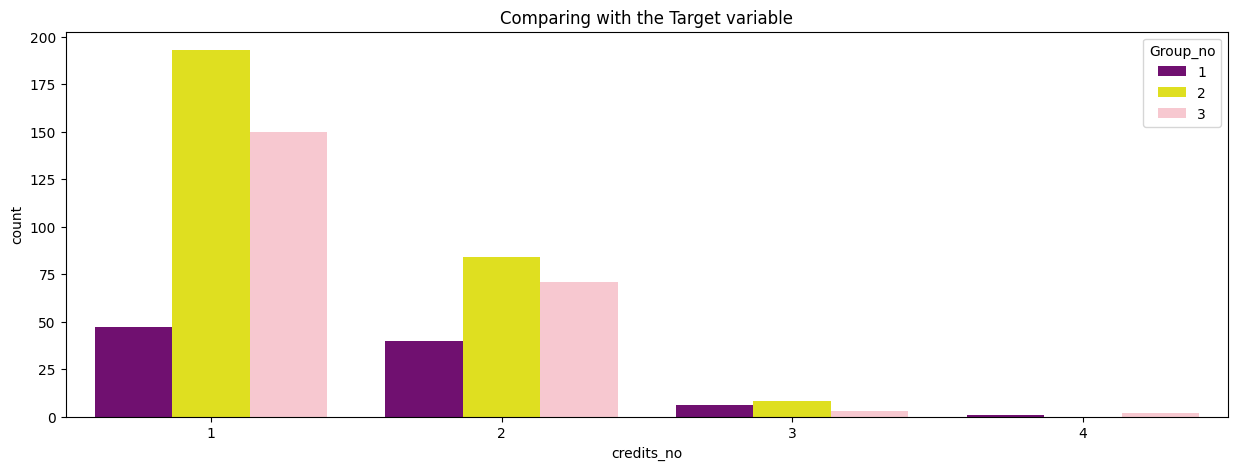

job_type


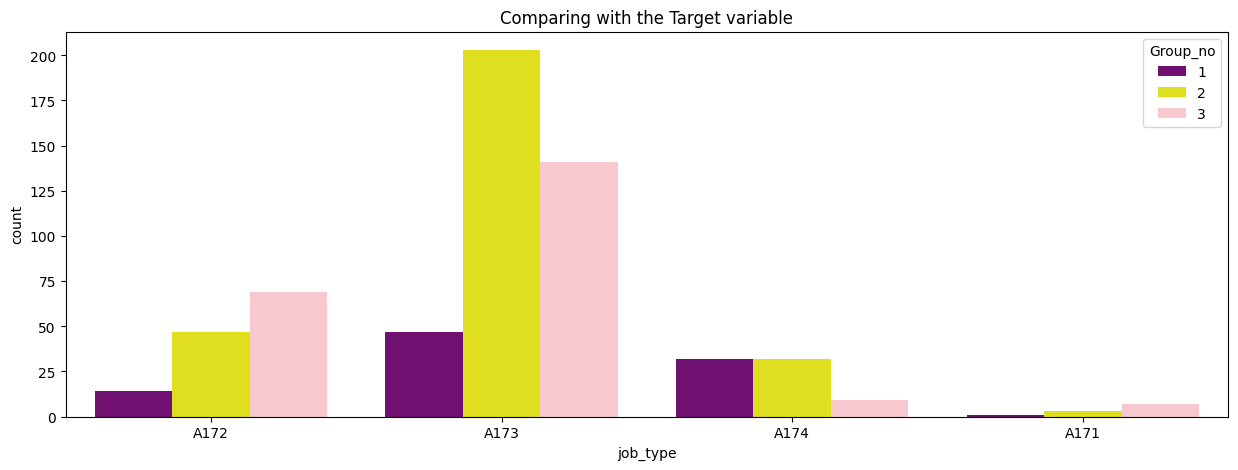

liables


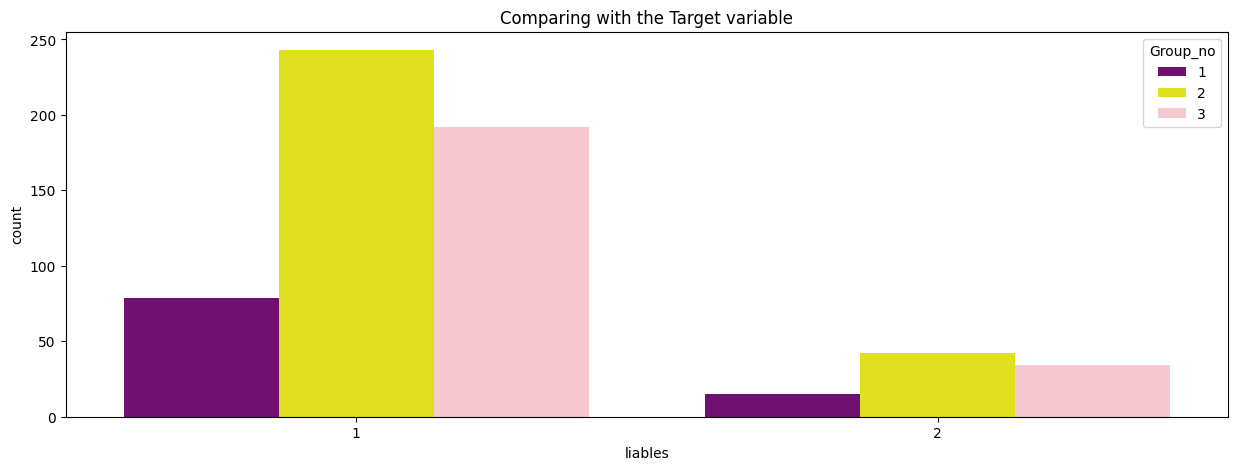

telephone


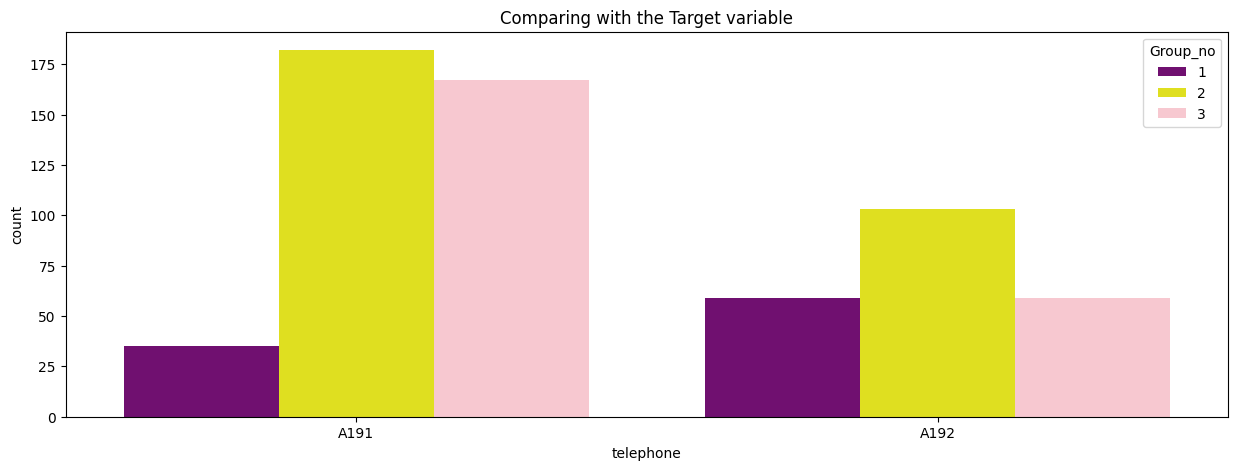

foreigner


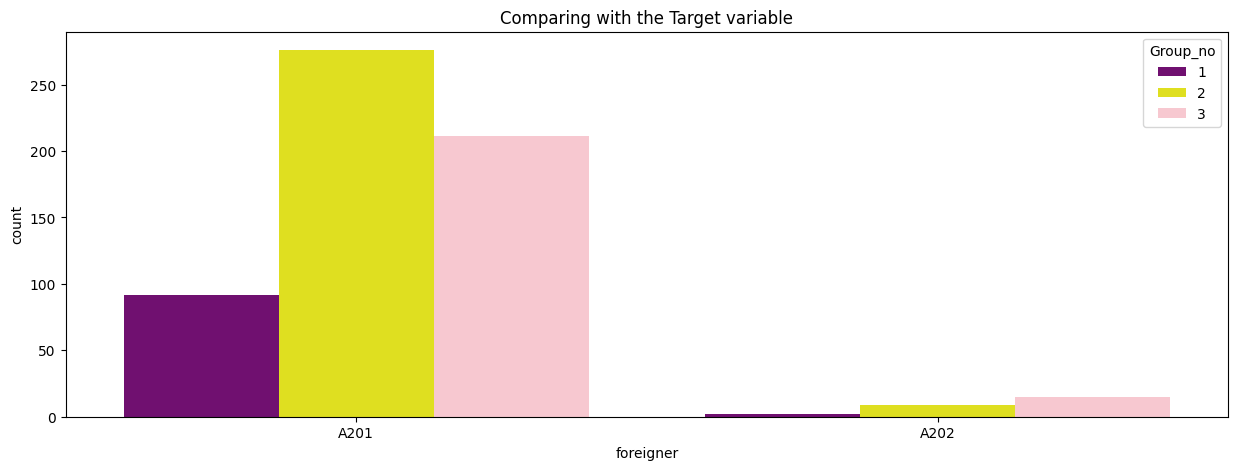

Group_no


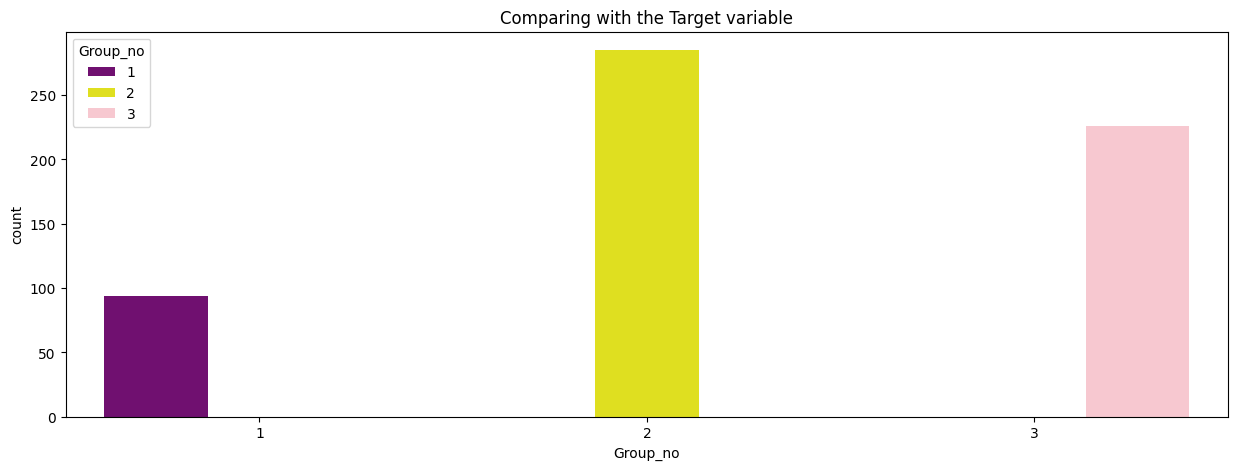

In [30]:
my_palette = sns.color_palette(["#800080", "#FFFF00", "#FFC0CB"])
for i in credit_df2.columns[1:]:
    print(i)   
    sns.countplot(x=i, hue = 'Group_no',data=credit_df2, palette=my_palette)
    plt.title('Comparing with the Target variable')
    plt.show()

In [31]:
'''
Insights obtained
1.Duration in months for which the credit is existing is mostly 12(mostly belongs to group3) 
   or 24(mostly belongs to group2).
2. credit_history: Most people are in A32  category,means installments have been payed back in full amount.
  (Most of the people belongs to group2)
3.purpose: Most people taken loan to buy radio or TV.(Most of the people belongs to group2)
4.savings_account: People having less savings take more loan(A61 Most of the people belongs to group2)
5.employment_st:individual has been employed for more than a year but less than four years takes more loan.
    (A73 Most of the people belongs to group2)
6.poi:Higest percentage of disposable income is spent on loan interest amount is 4.0
    (People belongs to Group 3 mostly).
7.personal_status:unmarried males is the highest category.Out of which more people belongs to group2.
8.guarantors:Most of the cases single individual is involved in the loan application(More people in group2)
9.resident_since: Mostly applicant has been a resident  for 4 years or 2 years.(More people in group2)
10.property_type: Most ofthe individual holds cars or other properties(More people in group2)
11.age: age between 20-60 have loans.
12.installment_type:people mostly pays installment to bank(More people in group2)
13. housing_type:Most of the applicants own a house.(More people in group2)
14.credits_no: Most people have one credit(More people in group2).
15. job_type:skilled employee or official have more credits(More people in group2).
16.foreigner: foreigner have more credits than residents(More people in group2).
'''

'\nInsights obtained\n1.Duration in months for which the credit is existing is mostly 12(mostly belongs to group3) \n   or 24(mostly belongs to group2).\n2. credit_history: Most people are in A32  category,means installments have been payed back in full amount.\n  (Most of the people belongs to group2)\n3.purpose: Most people taken loan to buy radio or TV.(Most of the people belongs to group2)\n4.savings_account: People having less savings take more loan(A61 Most of the people belongs to group2)\n5.employment_st:individual has been employed for more than a year but less than four years takes more loan.\n    (A73 Most of the people belongs to group2)\n6.poi:Higest percentage of disposable income is spent on loan interest amount is 4.0\n    (People belongs to Group 3 mostly).\n7.personal_status:unmarried males is the highest category.Out of which more people belongs to group2.\n8.guarantors:Most of the cases single individual is involved in the loan application(More people in group2)\n9.

In [32]:
#Choosing categorical columns
credit_df2.select_dtypes(['object']).columns

Index(['account_info', 'credit_history', 'purpose', 'savings_account',
       'employment_st', 'personal_status', 'gurantors', 'property_type',
       'installment_type', 'housing_type', 'job_type', 'telephone',
       'foreigner', 'Group_no'],
      dtype='object')

In [33]:
#Ml models dont take categorical values.So doing label encoding for categorical variables.
account_info_le=le()
credit_history_le=le()
purpose_le=le()
savings_account_le=le()
employment_st_le=le()
personal_status_le=le()
gurantors_le=le()
property_type_le=le()
installment_type_le=le()
housing_type_le=le()
job_type_le=le()
telephone_le=le()
foreigner_le=le()
Group_no_le=le()

In [34]:
credit_df2['account_info'] = account_info_le.fit_transform(credit_df2['account_info'])
credit_df2['credit_history'] = credit_history_le.fit_transform(credit_df2['credit_history'])
credit_df2['purpose'] = purpose_le.fit_transform(credit_df2['purpose'])
credit_df2['savings_account'] = savings_account_le.fit_transform(credit_df2['savings_account'])
credit_df2['employment_st'] = employment_st_le.fit_transform(credit_df2['employment_st'])
credit_df2['personal_status'] = personal_status_le.fit_transform(credit_df2['personal_status'])
credit_df2['gurantors'] = gurantors_le.fit_transform(credit_df2['gurantors'])
credit_df2['property_type'] = property_type_le.fit_transform(credit_df2['property_type'])
credit_df2['installment_type'] = installment_type_le.fit_transform(credit_df2['installment_type'])
credit_df2['housing_type'] = housing_type_le.fit_transform(credit_df2['housing_type'])
credit_df2['job_type'] = job_type_le.fit_transform(credit_df2['job_type'])
credit_df2['telephone'] = telephone_le.fit_transform(credit_df2['telephone'])
credit_df2['foreigner'] = foreigner_le.fit_transform(credit_df2['foreigner'])
credit_df2['Group_no'] = Group_no_le.fit_transform(credit_df2['Group_no'])

<AxesSubplot: >

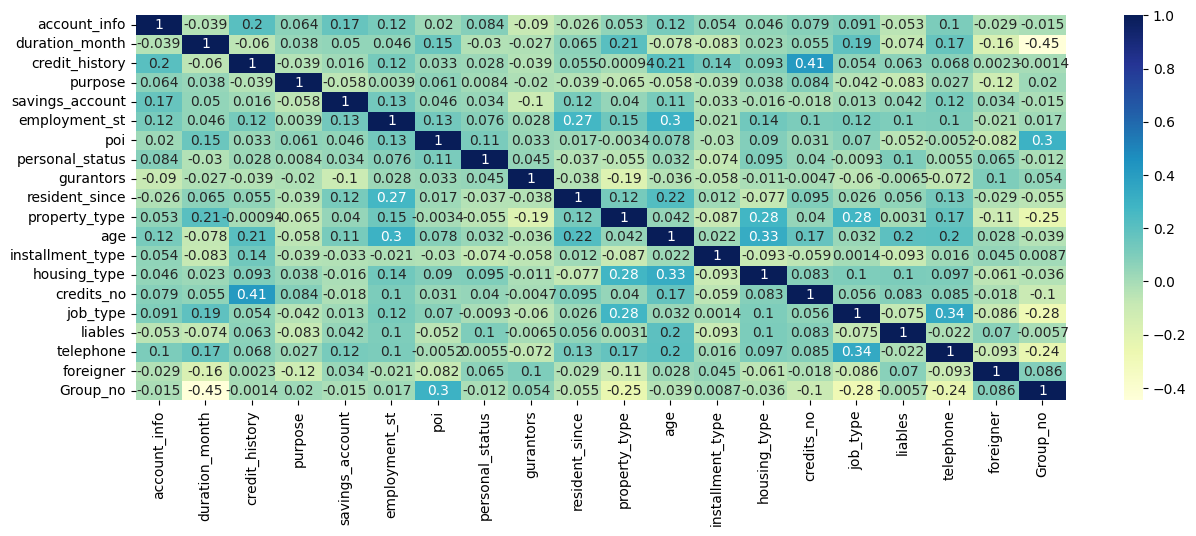

In [35]:
sns.heatmap(credit_df2.corr() , annot = True , cmap = "YlGnBu")

In [36]:
#feature selection
round(abs(credit_df2.corr()['Group_no']*100).sort_values(ascending=False), 2)


Group_no            100.00
duration_month       44.63
poi                  29.84
job_type             27.72
property_type        24.52
telephone            23.86
credits_no           10.01
foreigner             8.61
resident_since        5.50
gurantors             5.42
age                   3.90
housing_type          3.59
purpose               2.00
employment_st         1.69
savings_account       1.55
account_info          1.48
personal_status       1.24
installment_type      0.87
liables               0.57
credit_history        0.14
Name: Group_no, dtype: float64

<AxesSubplot: >

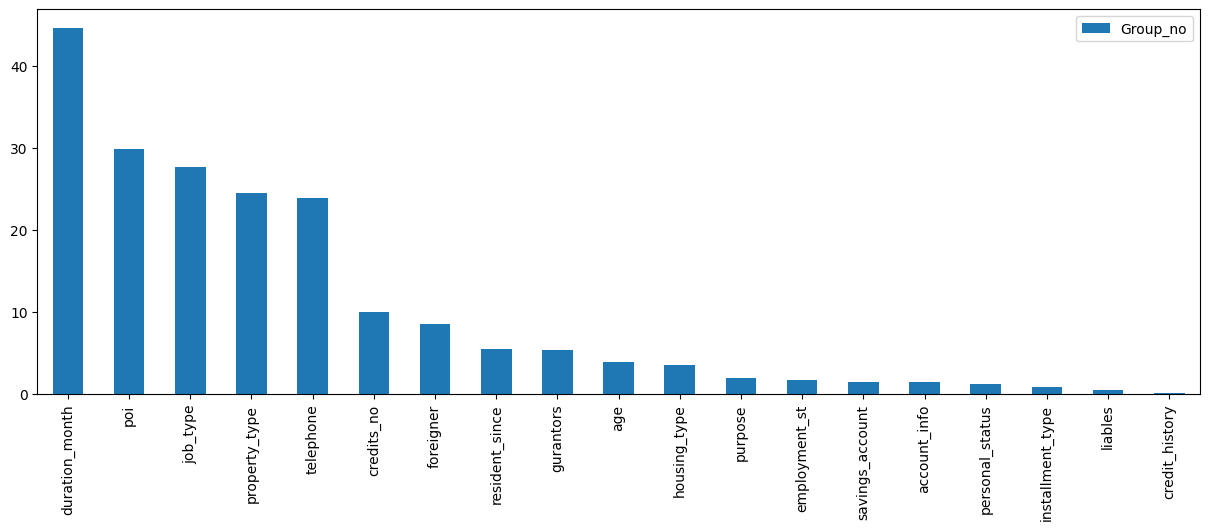

In [37]:
pd.DataFrame(abs(credit_df2.corr()['Group_no'].drop('Group_no')*100).sort_values(ascending=False)).plot.bar()

Feature selection

In [38]:
credit_df2.shape

(605, 20)

In [39]:
'''
personal_status,installment_type,liables,credit_history have less impact on Group_no.
So deleting these 4 columns.
'''

'\npersonal_status,installment_type,liables,credit_history have less impact on Group_no.\nSo deleting these 4 columns.\n'

In [40]:
mdf=credit_df2[['account_info', 'duration_month', 'credit_history', 'purpose',
       'employment_st', 'poi', 'personal_status',
       'gurantors', 'resident_since', 'property_type',
       'housing_type', 'credits_no', 'job_type',
       'telephone', 'foreigner', 'Group_no']]

Model&Evaluation

In [41]:
#Seperating input features and Target
X_train = mdf.drop(['Group_no'] , axis = 1).values
y_train = mdf['Group_no' ].values

In [42]:
X_train.shape

(605, 15)

In [43]:
y_train.shape

(605,)

In [44]:
#Data scaling using Robust Scalar
ro_scaler = rbScaler()
X_train= ro_scaler.fit_transform(X_train)
X_train.shape

(605, 15)

In [45]:
#Random Forest Classifier
rf = rfClassifier(max_features= 14, max_depth= 8)
rf.fit(X_train , y_train)

RandomForestClassifier(max_depth=8, max_features=14)

In [46]:
rf_score = rf.score(X_train , y_train)
rf_score 

0.9140495867768595

In [47]:
#Reading test data
X_test=pd.read_csv("ABC_Bank_test_data.csv")
X_test.sample(10)

,serial number,account_info,duration_month,credit_history,purpose,savings_account,employment_st,poi,personal_status,gurantors,resident_since,property_type,age,installment_type,housing_type,credits_no,job_type,liables,telephone,foreigner
104,105,A14,24,A32,A43,A61,A75,4.0,A93,A101,1,A121,NaN,A143,A152,1,A174,1,A192,A201
135,136,A12,30,A33,A43,A62,A72,4.0,A93,A101,3,A124,30.0,A142,A152,2,A174,1,A191,A201
117,118,A11,6,A32,A40,A61,A75,1.0,A93,A101,4,A124,68.0,A141,A152,1,A174,1,A192,A201
41,42,A14,21,A33,A41,A61,A73,3.0,A93,A101,2,A121,28.0,A142,A152,2,A172,1,A191,A201
191,192,A14,15,A31,A43,A62,A75,4.0,A93,A101,4,A123,34.0,A141,A152,1,A172,2,A191,A201
50,51,A11,20,A34,A40,A61,A73,4.0,A94,A103,2,A122,33.0,A141,A151,2,A173,1,A191,A202
48,49,A11,9,A32,A43,A61,A74,3.0,A93,A101,4,A121,59.0,A143,A152,1,A173,1,A191,A201
161,162,A12,21,A33,A40,A61,NaN,1.0,A91,A101,4,A122,47.0,A143,A152,2,A173,1,A191,A201
193,194,A11,36,A32,A42,A61,A71,4.0,A93,A101,3,A122,30.0,A143,A152,1,A174,1,A192,A201
105,106,A11,12,A32,A43,A61,A73,2.0,A93,A101,2,A121,20.0,A143,A151,1,A174,2,A192,A201


In [48]:
X_test.shape

(200, 20)

In [49]:
#Applying All the  changes made on X_train to X_test

In [50]:
X_test=X_test.drop('serial number',axis=1)
X_test.shape

(200, 19)

In [51]:
X_test.isnull().sum()

account_info        0
duration_month      0
credit_history      0
purpose             0
savings_account     0
employment_st       5
poi                 5
personal_status     0
gurantors           0
resident_since      0
property_type       0
age                 2
installment_type    0
housing_type        8
credits_no          0
job_type            0
liables             0
telephone           0
foreigner           0
dtype: int64

In [52]:
# Replacing all NA values for 'employment_st' with mode() of values in colomn 'employment_st'
# Replacing all NA values for 'housing_type' with mode() of values in colomn 'housing_type'
#filling 0.0 for missing values in 'poi'
#filling 0.0 for missing values in 'age'

X_test['employment_st'].fillna(X_test['employment_st'].mode()[0], inplace=True)
X_test['poi'].fillna(0.0, inplace=True)
X_test['age'].fillna(0.0, inplace=True)
X_test['housing_type'].fillna(X_test['housing_type'].mode()[0], inplace=True)
'''
#Remove rows of features 'poi','age','gurantors','housing_type' where null value is present.
X_test.drop(X_test[X_test['poi'].isnull()].index, inplace=True)
X_test.drop(X_test[X_test['age'].isnull()].index, inplace=True)
X_test.drop(X_test[X_test['housing_type'].isnull()].index, inplace=True)
'''

X_test.isnull().sum()

account_info        0
duration_month      0
credit_history      0
purpose             0
savings_account     0
employment_st       0
poi                 0
personal_status     0
gurantors           0
resident_since      0
property_type       0
age                 0
installment_type    0
housing_type        0
credits_no          0
job_type            0
liables             0
telephone           0
foreigner           0
dtype: int64

In [53]:

duplicates = X_test.duplicated()

# Print the duplicate rows
print(X_test[duplicates])

Empty DataFrame
Columns: [account_info, duration_month, credit_history, purpose, savings_account, employment_st, poi, personal_status, gurantors, resident_since, property_type, age, installment_type, housing_type, credits_no, job_type, liables, telephone, foreigner]
Index: []


no duplicates present in test data

In [54]:
X_test.shape

(200, 19)

In [55]:
X_test.select_dtypes(['object']).columns

Index(['account_info', 'credit_history', 'purpose', 'savings_account',
       'employment_st', 'personal_status', 'gurantors', 'property_type',
       'installment_type', 'housing_type', 'job_type', 'telephone',
       'foreigner'],
      dtype='object')

In [56]:
account_info_le=le()
credit_history_le=le()
purpose_le=le()
savings_account_le=le()
employment_st_le=le()
personal_status_le=le()
gurantors_le=le()
property_type_le=le()
installment_type_le=le()
housing_type_le=le()
job_type_le=le()
telephone_le=le()
foreigner_le=le()
Group_no_le=le()

In [57]:
X_test['account_info'] = account_info_le.fit_transform(X_test['account_info'])
X_test['credit_history'] = credit_history_le.fit_transform(X_test['credit_history'])
X_test['purpose'] = purpose_le.fit_transform(X_test['purpose'])
X_test['savings_account'] = savings_account_le.fit_transform(X_test['savings_account'])
X_test['employment_st'] = employment_st_le.fit_transform(X_test['employment_st'])
X_test['personal_status'] = personal_status_le.fit_transform(X_test['personal_status'])
X_test['gurantors'] = gurantors_le.fit_transform(X_test['gurantors'])
X_test['property_type'] = property_type_le.fit_transform(X_test['property_type'])
X_test['installment_type'] = installment_type_le.fit_transform(X_test['installment_type'])
X_test['housing_type'] = housing_type_le.fit_transform(X_test['housing_type'])
X_test['job_type'] = job_type_le.fit_transform(X_test['job_type'])
X_test['telephone'] = telephone_le.fit_transform(X_test['telephone'])
X_test['foreigner'] = foreigner_le.fit_transform(X_test['foreigner'])


In [58]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   account_info      200 non-null    int32  
 1   duration_month    200 non-null    int64  
 2   credit_history    200 non-null    int32  
 3   purpose           200 non-null    int32  
 4   savings_account   200 non-null    int32  
 5   employment_st     200 non-null    int32  
 6   poi               200 non-null    float64
 7   personal_status   200 non-null    int32  
 8   gurantors         200 non-null    int32  
 9   resident_since    200 non-null    int64  
 10  property_type     200 non-null    int32  
 11  age               200 non-null    float64
 12  installment_type  200 non-null    int32  
 13  housing_type      200 non-null    int32  
 14  credits_no        200 non-null    int64  
 15  job_type          200 non-null    int32  
 16  liables           200 non-null    int64  
 1

In [59]:
X_test=X_test.drop('age',axis=1)
X_test=X_test.drop('installment_type',axis=1)
X_test=X_test.drop('savings_account',axis=1)
X_test=X_test.drop('liables',axis=1)


In [60]:
X_test.shape

(200, 15)

In [61]:
X_test= ro_scaler.fit_transform(X_test)
X_test.shape

(200, 15)

In [62]:
y_pred2 = rf.predict(X_test)
y_pred2

array([1, 2, 1, 2, 2, 1, 2, 2, 0, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2,
       1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 0, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 2, 2, 2, 2, 0, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1,
       2, 1, 0, 2, 0, 1, 1, 2, 1, 2, 1, 1, 2, 0, 1, 1, 2, 2, 1, 2, 1, 1,
       0, 0, 0, 2, 2, 0, 2, 1, 2, 2, 2, 1, 0, 1, 0, 2, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 2, 0, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2,
       2, 2, 2, 0, 2, 2, 1, 0, 1, 2, 1, 1, 2, 0, 0, 2, 2, 1, 2, 0, 1, 1,
       2, 1, 1, 1, 0, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2,
       1, 1])

In [63]:
# Write the predictions 
with open('ABC_Bank_submission_rf.csv', 'w') as f:
    f.write('serial number, group_no\n')
    for i, pred in enumerate(y_pred2):
        f.write(f'{i+1}, {pred}\n')